In [ ]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Navigate to the current directory
from google.colab import userdata
import os
os.chdir(userdata.get('CURRENT_DIR'))

Mounted at /content/drive


In [ ]:
# General data science libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Manually construct the list of FAANG tickers
ticker_list = ["META", "AAPL", "AMZN", "NFLX", "GOOG"]

# 1. Load & transform stock prices

In [ ]:
historical_prices = pd.read_csv('data/raw/raw_prices.csv')
historical_prices.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Ticker
0,0,2024-12-06 00:00:00-05:00,609.066372,628.723017,607.499085,622.713257,16935500,META
1,1,2024-12-09 00:00:00-05:00,622.862959,625.338798,605.143030,612.530518,11426000,META
2,2,2024-12-10 00:00:00-05:00,616.513785,624.530210,611.701943,618.270813,10938900,META
3,3,2024-12-11 00:00:00-05:00,622.313869,637.318434,620.477020,631.608093,10837200,META
4,4,2024-12-12 00:00:00-05:00,630.430133,635.581364,626.147422,629.721313,7474700,META


In [ ]:
historical_prices.drop(columns=["Open", "High", "Low"], inplace=True) # Interested in Close prices & Volumes only
historical_prices.rename(columns={"Unnamed: 0": "Step"}, inplace=True)
historical_prices.head()

,Step,Date,Close,Volume,Ticker
0,0,2024-12-06 00:00:00-05:00,622.713257,16935500,META
1,1,2024-12-09 00:00:00-05:00,612.530518,11426000,META
2,2,2024-12-10 00:00:00-05:00,618.270813,10938900,META
3,3,2024-12-11 00:00:00-05:00,631.608093,10837200,META
4,4,2024-12-12 00:00:00-05:00,629.721313,7474700,META


In [ ]:
historical_prices["Ticker"].value_counts()

,count
Ticker,
META,76
AAPL,76
AMZN,76
NFLX,76
GOOG,76


In [ ]:
# Check the date range
for ticker in ticker_list:
    print(historical_prices[historical_prices['Ticker'] == ticker]["Date"].min(),
          historical_prices[historical_prices['Ticker'] == ticker]["Date"].max())

2024-12-06 00:00:00-05:00 2025-03-28 00:00:00-04:00
2024-12-06 00:00:00-05:00 2025-03-28 00:00:00-04:00
2024-12-06 00:00:00-05:00 2025-03-28 00:00:00-04:00
2024-12-06 00:00:00-05:00 2025-03-28 00:00:00-04:00
2024-12-06 00:00:00-05:00 2025-03-28 00:00:00-04:00


In [ ]:
# Calculate the returns
historical_prices['Return'] = (historical_prices['Close'] - historical_prices['Close'].shift(1)) / historical_prices['Close'].shift(1)
# We can safely ignore the wrong calculation for time step 0 of each stock, as that time step will not be included anyway

historical_prices.head()

,Step,Date,Close,Volume,Ticker,Return
0,0,2024-12-06 00:00:00-05:00,622.713257,16935500,META,NaN
1,1,2024-12-09 00:00:00-05:00,612.530518,11426000,META,-0.016352
2,2,2024-12-10 00:00:00-05:00,618.270813,10938900,META,0.009371
3,3,2024-12-11 00:00:00-05:00,631.608093,10837200,META,0.021572
4,4,2024-12-12 00:00:00-05:00,629.721313,7474700,META,-0.002987


In [ ]:
# Calculate the 10-day (== 2 trading weeks) volatility of the stock based on the return
historical_prices['Volatility'] = historical_prices['Return'].rolling(window=10).std()
historical_prices.head()

,Step,Date,Close,Volume,Ticker,Return,Volatility
0,0,2024-12-06 00:00:00-05:00,622.713257,16935500,META,NaN,NaN
1,1,2024-12-09 00:00:00-05:00,612.530518,11426000,META,-0.016352,NaN
2,2,2024-12-10 00:00:00-05:00,618.270813,10938900,META,0.009371,NaN
3,3,2024-12-11 00:00:00-05:00,631.608093,10837200,META,0.021572,NaN
4,4,2024-12-12 00:00:00-05:00,629.721313,7474700,META,-0.002987,NaN


In [ ]:
# Keeping only the date part in the Date column
# First check if Date is string
type(historical_prices["Date"][1])

str

In [ ]:
# Use regex to extract the date part
import re

historical_prices["Date"] = historical_prices["Date"].apply(lambda x: re.findall(r'\d{4}-\d{2}-\d{2}', x)[0])
historical_prices.head()

,Step,Date,Close,Volume,Ticker,Return,Volatility
0,0,2024-12-06,622.713257,16935500,META,NaN,NaN
1,1,2024-12-09,612.530518,11426000,META,-0.016352,NaN
2,2,2024-12-10,618.270813,10938900,META,0.009371,NaN
3,3,2024-12-11,631.608093,10837200,META,0.021572,NaN
4,4,2024-12-12,629.721313,7474700,META,-0.002987,NaN


In [ ]:
# Log transform and Volume
historical_prices['Log_Volume'] = np.log1p(historical_prices['Volume'])
historical_prices.head()

,Step,Date,Close,Volume,Ticker,Return,Volatility,Log_Volume
0,0,2024-12-06,622.713257,16935500,META,NaN,NaN,16.644923
1,1,2024-12-09,612.530518,11426000,META,-0.016352,NaN,16.251402
2,2,2024-12-10,618.270813,10938900,META,0.009371,NaN,16.207836
3,3,2024-12-11,631.608093,10837200,META,0.021572,NaN,16.198495
4,4,2024-12-12,629.721313,7474700,META,-0.002987,NaN,15.827035


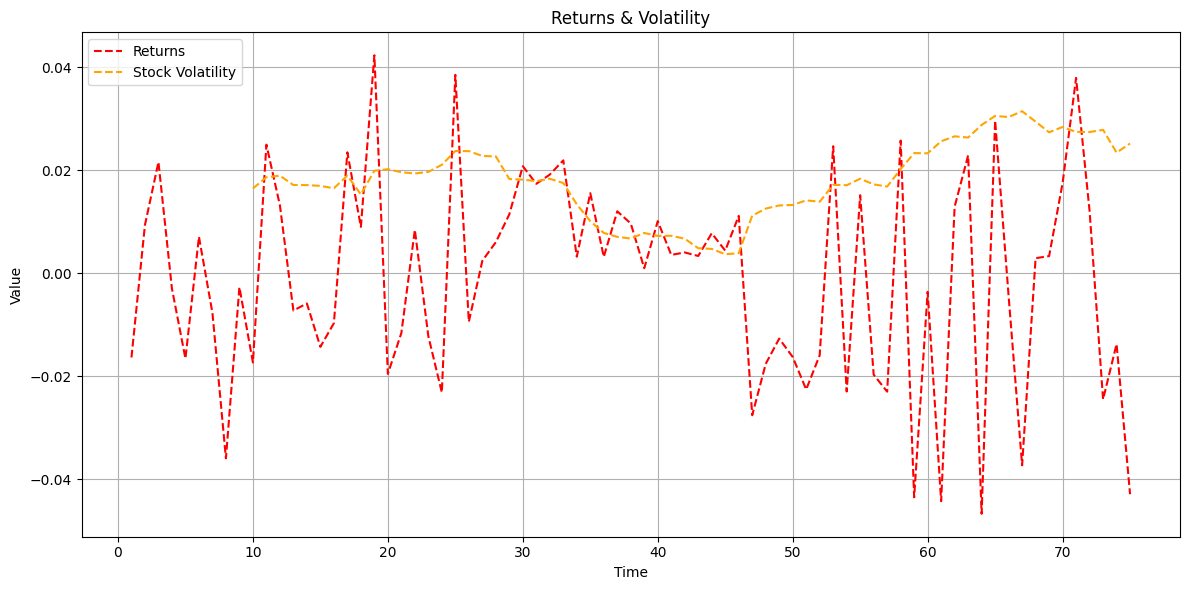

In [ ]:
# Plot the return, volatility and volume for a stock
plot_df = historical_prices[historical_prices['Ticker'] == "META"] # Try META for example
plt.figure(figsize=(12, 6))
plt.plot(plot_df["Step"], plot_df['Return'], label='Returns', color='red', linestyle='--')
plt.plot(plot_df["Step"], plot_df['Volatility'], label='Stock Volatility', color='orange', linestyle='--')
plt.title('Returns & Volatility')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The variables (including log_volume too) clearly needs to be standardized for further analysis

# 2. Load & transform sentiment scores

In [ ]:
# Load all the sentiment scores
# Keep a list of model prefixes
model_prefixes = ["finetuned_bert", "finetuned_finbert"]

sentiment_scores_dfs = []

for model_prefix in model_prefixes:
    sentiment_scores_dfs.append(pd.read_csv(f'sentiment_scores/{model_prefix}_predictions.csv'))

In [ ]:
sentiment_scores_dfs[0].head()

,negative_score,neutral_score,positive_score,overall_score
0,0.004877,0.116948,0.878175,0.873298
1,0.085837,0.434113,0.480050,0.394213
2,0.017958,0.933749,0.048293,0.030335
3,0.003885,0.017159,0.978955,0.975070
4,0.003637,0.015134,0.981229,0.977592


In [ ]:
sentiment_scores_dfs[1].head()

,negative_score,neutral_score,positive_score,overall_score
0,0.007290,0.246180,0.746530,0.739240
1,0.031595,0.659880,0.308525,0.276930
2,0.016452,0.838903,0.144645,0.128193
3,0.007489,0.008705,0.983806,0.976316
4,0.007661,0.008405,0.983934,0.976274


In [ ]:
for df in sentiment_scores_dfs:
    print(df.shape[0])

4191
4191


In [ ]:
# Load the original test set
news_test = pd.read_csv("data/merged/news_SA_test.csv")
news_test.head()

,ticker,sentiment,title,annot_title,date,source_dataset
0,NFLX,positive,Should You Buy Netflix Stock Before Dec. 25?,[TICKER] NFLX | [TITLE] Should You Buy Netflix...,2024-12-07,polygon_news_2024_raw
1,AMZN,neutral,Is Costco Stock a Buy for 2025?,[TICKER] AMZN | [TITLE] Is Costco Stock a Buy ...,2024-12-07,polygon_news_2024_raw
2,GOOG,neutral,1 Growth Stock Down 60% to Buy Right Now,[TICKER] GOOG | [TITLE] 1 Growth Stock Down 60...,2024-12-07,polygon_news_2024_raw
3,META,positive,"Stock Markets Extends Record Highs, US Labor M...",[TICKER] META | [TITLE] Stock Markets Extends ...,2024-12-07,polygon_news_2024_raw
4,AMZN,positive,"Stock Markets Extends Record Highs, US Labor M...",[TICKER] AMZN | [TITLE] Stock Markets Extends ...,2024-12-07,polygon_news_2024_raw


In [ ]:
news_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4191 entries, 0 to 4190
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ticker          4191 non-null   object
 1   sentiment       4191 non-null   object
 2   title           4191 non-null   object
 3   annot_title     4191 non-null   object
 4   date            4191 non-null   object
 5   source_dataset  4191 non-null   object
dtypes: object(6)
memory usage: 196.6+ KB


We see that all the news & sentiment prediction dataset has the same number of rows, which is expected

In [ ]:
type(news_test["date"][0])

str

In [ ]:
# Merge the news & news score set
merged_news_scores = news_test[['date', 'ticker', 'sentiment']].copy()
merged_news_scores.rename(columns={"date": "Date", "ticker": "Ticker", "sentiment": "ground_truth"}, inplace=True)

# Map the ground truths to scores
merged_news_scores['ground_truth'] = merged_news_scores['ground_truth'].map({'negative': -1, 'neutral': 0, 'positive': 1})
merged_news_scores.head()

,Date,Ticker,ground_truth
0,2024-12-07,NFLX,1
1,2024-12-07,AMZN,0
2,2024-12-07,GOOG,0
3,2024-12-07,META,1
4,2024-12-07,AMZN,1


In [ ]:
# Horizontally concantenate merged_news_scores with the news datasets
for i in range(0, len(model_prefixes)):
    merged_news_scores = pd.concat([merged_news_scores, sentiment_scores_dfs[i]['overall_score']], axis=1)
    merged_news_scores.rename(columns={"overall_score": f"{model_prefixes[i]}_scores"}, inplace=True)

merged_news_scores.head()

,Date,Ticker,ground_truth,finetuned_bert_scores,finetuned_finbert_scores
0,2024-12-07,NFLX,1,0.873298,0.739240
1,2024-12-07,AMZN,0,0.394213,0.276930
2,2024-12-07,GOOG,0,0.030335,0.128193
3,2024-12-07,META,1,0.975070,0.976316
4,2024-12-07,AMZN,1,0.977592,0.976274


In [ ]:
merged_news_scores.isna().sum() # should be 0 for all columns

,0
Date,0
Ticker,0
ground_truth,0
finetuned_bert_scores,0
finetuned_finbert_scores,0


In [ ]:
# Get the list of trading days
trading_days = historical_prices['Date'].unique()
trading_days

array(['2024-12-06', '2024-12-09', '2024-12-10', '2024-12-11',
       '2024-12-12', '2024-12-13', '2024-12-16', '2024-12-17',
       '2024-12-18', '2024-12-19', '2024-12-20', '2024-12-23',
       '2024-12-24', '2024-12-26', '2024-12-27', '2024-12-30',
       '2024-12-31', '2025-01-02', '2025-01-03', '2025-01-06',
       '2025-01-07', '2025-01-08', '2025-01-10', '2025-01-13',
       '2025-01-14', '2025-01-15', '2025-01-16', '2025-01-17',
       '2025-01-21', '2025-01-22', '2025-01-23', '2025-01-24',
       '2025-01-27', '2025-01-28', '2025-01-29', '2025-01-30',
       '2025-01-31', '2025-02-03', '2025-02-04', '2025-02-05',
       '2025-02-06', '2025-02-07', '2025-02-10', '2025-02-11',
       '2025-02-12', '2025-02-13', '2025-02-14', '2025-02-18',
       '2025-02-19', '2025-02-20', '2025-02-21', '2025-02-24',
       '2025-02-25', '2025-02-26', '2025-02-27', '2025-02-28',
       '2025-03-03', '2025-03-04', '2025-03-05', '2025-03-06',
       '2025-03-07', '2025-03-10', '2025-03-11', '2025-

In [ ]:
# Get the range of dates in the current news_score dataset
min(merged_news_scores['Date']), max(merged_news_scores['Date'])

('2024-12-07', '2025-03-28')

In [ ]:
# Define a function to adjust the news date to its nearest trading day
def adjust_news_date(date):
    """Adjust the date of the news to its nearest trading day.
    If a news piece is not released on a trading day, increment until the nearest trading day."""

    if date > "2025-03-28":
        print("Error: Some dates are in the future")
        return date

    if date in trading_days:
        return date

    date_obj = pd.to_datetime(date)
    while date_obj.strftime('%Y-%m-%d') not in trading_days:
        date_obj = date_obj + pd.Timedelta(days=1)
        date = date_obj.strftime('%Y-%m-%d')
    return date

    # Error checking
    if date not in trading_days:
        print("Error: Some dates are not adjusted correctly")
        return date

In [ ]:
# Apply on merged_news_scores
merged_news_scores['Date'] = merged_news_scores['Date'].apply(adjust_news_date)
merged_news_scores.head()

,Date,Ticker,ground_truth,finetuned_bert_scores,finetuned_finbert_scores
0,2024-12-09,NFLX,1,0.873298,0.739240
1,2024-12-09,AMZN,0,0.394213,0.276930
2,2024-12-09,GOOG,0,0.030335,0.128193
3,2024-12-09,META,1,0.975070,0.976316
4,2024-12-09,AMZN,1,0.977592,0.976274


In [ ]:
# Apply time steps based on the Date column
# Since I already have the time steps in historical_prices, I simply merge that with merged_news_scores
merged_news_scores = pd.merge(merged_news_scores, historical_prices[historical_prices['Ticker'] == "META"][['Date', 'Step']], on='Date', how='left')
merged_news_scores.head()

,Date,Ticker,ground_truth,finetuned_bert_scores,finetuned_finbert_scores,Step
0,2024-12-09,NFLX,1,0.873298,0.739240,1
1,2024-12-09,AMZN,0,0.394213,0.276930,1
2,2024-12-09,GOOG,0,0.030335,0.128193,1
3,2024-12-09,META,1,0.975070,0.976316,1
4,2024-12-09,AMZN,1,0.977592,0.976274,1


In [ ]:
merged_news_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4191 entries, 0 to 4190
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      4191 non-null   object 
 1   Ticker                    4191 non-null   object 
 2   ground_truth              4191 non-null   int64  
 3   finetuned_bert_scores     4191 non-null   float64
 4   finetuned_finbert_scores  4191 non-null   float64
 5   Step                      4191 non-null   int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 196.6+ KB


In [ ]:
# Define a function to calculate the average sentiment scores & sentiment volatility over a 10-step period
def calculate_sentiment_metrics(df, score_column, window_size=10):
    """Calculate the average sentiment scores & sentiment volatility over a 10-day period.
    Sentiment volatility = stddev of sentiment scores."""

    df = df[['Step', 'Ticker', score_column]].copy()
    df = df.sort_values(by='Step')

    # Store results
    result_rows = []

    # Group by ticker
    for ticker, group in df.groupby('Ticker'):
        group = group.sort_values(by='Step').reset_index(drop=True)

        # Get unique time steps (trading days with news)
        steps = group['Step'].unique()

        for step in range(steps.min(), steps.max()+1):
            # Look back window_size steps (inclusive of current step)
            min_step = step - window_size + 1
            window_news = group[(group['Step'] >= min_step) & (group['Step'] <= step)]

            # If there's no new piece in the window, print a message
            if window_news.empty:
                print(f"No news in window for {ticker} on step {step}")
                continue

            avg = window_news[score_column].mean()
            std = window_news[score_column].std(ddof=0)  # population stddev

            result_rows.append({
                'Ticker': ticker,
                'Step': step,
                'rolling_avg': avg,
                'rolling_std': std
            })

    result_df = pd.DataFrame(result_rows)
    return result_df


In [ ]:
# Apply on ground_truth first
merged_time_series = pd.merge(historical_prices, calculate_sentiment_metrics(merged_news_scores, "ground_truth"), on=["Ticker", "Step"], how="left")
merged_time_series.rename(columns={"rolling_avg" : "ground_truth_avg", "rolling_std" : "ground_truth_std"}, inplace=True)
merged_time_series.head()

,Step,Date,Close,Volume,Ticker,Return,Volatility,Log_Volume,ground_truth_avg,ground_truth_std
0,0,2024-12-06,622.713257,16935500,META,NaN,NaN,16.644923,NaN,NaN
1,1,2024-12-09,612.530518,11426000,META,-0.016352,NaN,16.251402,0.888889,0.314270
2,2,2024-12-10,618.270813,10938900,META,0.009371,NaN,16.207836,0.900000,0.300000
3,3,2024-12-11,631.608093,10837200,META,0.021572,NaN,16.198495,0.900000,0.300000
4,4,2024-12-12,629.721313,7474700,META,-0.002987,NaN,15.827035,0.833333,0.372678


In [ ]:
# Apply for the other columns
for model_prefix in model_prefixes:
    merged_time_series = pd.merge(merged_time_series, calculate_sentiment_metrics(merged_news_scores, f"{model_prefix}_scores"), on=["Ticker", "Step"], how="left")
    merged_time_series.rename(columns={"rolling_avg" : f"{model_prefix}_avg", "rolling_std" : f"{model_prefix}_std"}, inplace=True)

merged_time_series.head()

,Step,Date,Close,Volume,Ticker,Return,Volatility,Log_Volume,ground_truth_avg,ground_truth_std,finetuned_bert_avg,finetuned_bert_std,finetuned_finbert_avg,finetuned_finbert_std
0,0,2024-12-06,622.713257,16935500,META,NaN,NaN,16.644923,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2024-12-09,612.530518,11426000,META,-0.016352,NaN,16.251402,0.888889,0.314270,0.611909,0.455958,0.569659,0.435238
2,2,2024-12-10,618.270813,10938900,META,0.009371,NaN,16.207836,0.900000,0.300000,0.649597,0.447092,0.608598,0.429110
3,3,2024-12-11,631.608093,10837200,META,0.021572,NaN,16.198495,0.900000,0.300000,0.649597,0.447092,0.608598,0.429110
4,4,2024-12-12,629.721313,7474700,META,-0.002987,NaN,15.827035,0.833333,0.372678,0.611847,0.439535,0.585689,0.445919


In [ ]:
# Check for NaN values: should all be 5
for model_prefix in model_prefixes:
    print(merged_time_series[f"{model_prefix}_avg"].isna().sum(),
          merged_time_series[f"{model_prefix}_std"].isna().sum())

5 5
5 5


In [ ]:
# Remove 2024-12-06 from the dataset (stock metrics have been calculated)
merged_time_series = merged_time_series[merged_time_series['Date'] != "2024-12-06"]
merged_time_series.head()

,Step,Date,Close,Volume,Ticker,Return,Volatility,Log_Volume,ground_truth_avg,ground_truth_std,finetuned_bert_avg,finetuned_bert_std,finetuned_finbert_avg,finetuned_finbert_std
1,1,2024-12-09,612.530518,11426000,META,-0.016352,NaN,16.251402,0.888889,0.314270,0.611909,0.455958,0.569659,0.435238
2,2,2024-12-10,618.270813,10938900,META,0.009371,NaN,16.207836,0.900000,0.300000,0.649597,0.447092,0.608598,0.429110
3,3,2024-12-11,631.608093,10837200,META,0.021572,NaN,16.198495,0.900000,0.300000,0.649597,0.447092,0.608598,0.429110
4,4,2024-12-12,629.721313,7474700,META,-0.002987,NaN,15.827035,0.833333,0.372678,0.611847,0.439535,0.585689,0.445919
5,5,2024-12-13,619.299011,8453300,META,-0.016551,NaN,15.950068,0.777778,0.415740,0.642952,0.417835,0.635564,0.400927


In [ ]:
print(merged_time_series["ground_truth_avg"].isna().sum(),
      merged_time_series["ground_truth_std"].isna().sum())

for model_prefix in model_prefixes:
    print(merged_time_series[f"{model_prefix}_avg"].isna().sum(),
          merged_time_series[f"{model_prefix}_std"].isna().sum())

0 0
0 0
0 0


# 3. Remove invalid time steps

In [ ]:
# The volatility will only start being available for final step in the time window => The 10th step
# While technically aailable, the mean & std values for sentiment scores are also unreliable
# Double-checking
merged_time_series["Volatility"][9], merged_time_series["Volatility"][10]

(np.float64(nan), np.float64(0.016438882169255653))

In [ ]:
# Keeping the data from time step 10 onwards only
merged_time_series = merged_time_series[merged_time_series['Step'] >= 10]
merged_time_series.head()

,Step,Date,Close,Volume,Ticker,Return,Volatility,Log_Volume,ground_truth_avg,ground_truth_std,finetuned_bert_avg,finetuned_bert_std,finetuned_finbert_avg,finetuned_finbert_std
10,10,2024-12-20,584.729797,48989400,META,-0.017328,0.016439,17.707115,0.657895,0.474415,0.677050,0.441380,0.715528,0.388403
11,11,2024-12-23,599.316772,10205800,META,0.024947,0.018633,16.138467,0.588235,0.492153,0.705267,0.414385,0.778231,0.341756
12,12,2024-12-24,607.209778,4726100,META,0.013170,0.018927,15.368611,0.594595,0.490970,0.718899,0.399683,0.775622,0.340495
13,13,2024-12-26,602.813660,6081400,META,-0.007240,0.017106,15.620746,0.560976,0.496268,0.712741,0.396684,0.766148,0.358571
14,14,2024-12-27,599.276855,8084200,META,-0.005867,0.017102,15.905422,0.585366,0.492659,0.719713,0.388865,0.765315,0.351224


In [ ]:
merged_time_series['Ticker'].value_counts()

,count
Ticker,
META,66
AAPL,66
AMZN,66
NFLX,66
GOOG,66


In [ ]:
# Adjust the steps
merged_time_series['Step'] -= 10
merged_time_series.reset_index(drop=True, inplace=True)
merged_time_series.head()

,Step,Date,Close,Volume,Ticker,Return,Volatility,Log_Volume,ground_truth_avg,ground_truth_std,finetuned_bert_avg,finetuned_bert_std,finetuned_finbert_avg,finetuned_finbert_std
0,0,2024-12-20,584.729797,48989400,META,-0.017328,0.016439,17.707115,0.657895,0.474415,0.677050,0.441380,0.715528,0.388403
1,1,2024-12-23,599.316772,10205800,META,0.024947,0.018633,16.138467,0.588235,0.492153,0.705267,0.414385,0.778231,0.341756
2,2,2024-12-24,607.209778,4726100,META,0.013170,0.018927,15.368611,0.594595,0.490970,0.718899,0.399683,0.775622,0.340495
3,3,2024-12-26,602.813660,6081400,META,-0.007240,0.017106,15.620746,0.560976,0.496268,0.712741,0.396684,0.766148,0.358571
4,4,2024-12-27,599.276855,8084200,META,-0.005867,0.017102,15.905422,0.585366,0.492659,0.719713,0.388865,0.765315,0.351224


In [ ]:
# Saving the dataset
merged_time_series.to_csv("data/merged/time_series_data.csv", index=False)

# 4. Visualizations of the time series & Pre-processing

In [ ]:
# Load the dataset
merged_time_series = pd.read_csv("data/merged/time_series_data.csv")
merged_time_series.head()

,Step,Date,Close,Volume,Ticker,Return,Volatility,Log_Volume,ground_truth_avg,ground_truth_std,finetuned_bert_avg,finetuned_bert_std,finetuned_finbert_avg,finetuned_finbert_std
0,0,2024-12-20,584.729797,48989400,META,-0.017328,0.016439,17.707115,0.657895,0.474415,0.677050,0.441380,0.715528,0.388403
1,1,2024-12-23,599.316772,10205800,META,0.024947,0.018633,16.138467,0.588235,0.492153,0.705267,0.414385,0.778231,0.341756
2,2,2024-12-24,607.209778,4726100,META,0.013170,0.018927,15.368611,0.594595,0.490970,0.718899,0.399683,0.775622,0.340495
3,3,2024-12-26,602.813660,6081400,META,-0.007240,0.017106,15.620746,0.560976,0.496268,0.712741,0.396684,0.766148,0.358571
4,4,2024-12-27,599.276855,8084200,META,-0.005867,0.017102,15.905422,0.585366,0.492659,0.719713,0.388865,0.765315,0.351224


In [ ]:
merged_time_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Step                   330 non-null    int64  
 1   Date                   330 non-null    object 
 2   Close                  330 non-null    float64
 3   Volume                 330 non-null    int64  
 4   Ticker                 330 non-null    object 
 5   Return                 330 non-null    float64
 6   Volatility             330 non-null    float64
 7   Log_Volume             330 non-null    float64
 8   ground_truth_avg       330 non-null    float64
 9   ground_truth_std       330 non-null    float64
 10  finetuned_bert_avg     330 non-null    float64
 11  finetuned_bert_std     330 non-null    float64
 12  finetuned_finbert_avg  330 non-null    float64
 13  finetuned_finbert_std  330 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 36.2+ KB

In [ ]:
merged_time_series['Ticker'].value_counts()

,count
Ticker,
META,66
AAPL,66
AMZN,66
NFLX,66
GOOG,66


In [ ]:
# Split the time series into multiple ones based on the ticker
time_series_by_ticker = []

for ticker in ticker_list:
    time_series_by_ticker.append(merged_time_series[merged_time_series['Ticker'] == ticker])
    # Set Step as index
    time_series_by_ticker[-1].set_index('Step', inplace=True)

In [ ]:
time_series_by_ticker[0].head()

,Date,Close,Volume,Ticker,Return,Volatility,Log_Volume,ground_truth_avg,ground_truth_std,finetuned_bert_avg,finetuned_bert_std,finetuned_finbert_avg,finetuned_finbert_std
Step,,,,,,,,,,,,,
0,2024-12-20,584.729797,48989400,META,-0.017328,0.016439,17.707115,0.657895,0.474415,0.677050,0.441380,0.715528,0.388403
1,2024-12-23,599.316772,10205800,META,0.024947,0.018633,16.138467,0.588235,0.492153,0.705267,0.414385,0.778231,0.341756
2,2024-12-24,607.209778,4726100,META,0.013170,0.018927,15.368611,0.594595,0.490970,0.718899,0.399683,0.775622,0.340495
3,2024-12-26,602.813660,6081400,META,-0.007240,0.017106,15.620746,0.560976,0.496268,0.712741,0.396684,0.766148,0.358571
4,2024-12-27,599.276855,8084200,META,-0.005867,0.017102,15.905422,0.585366,0.492659,0.719713,0.388865,0.765315,0.351224


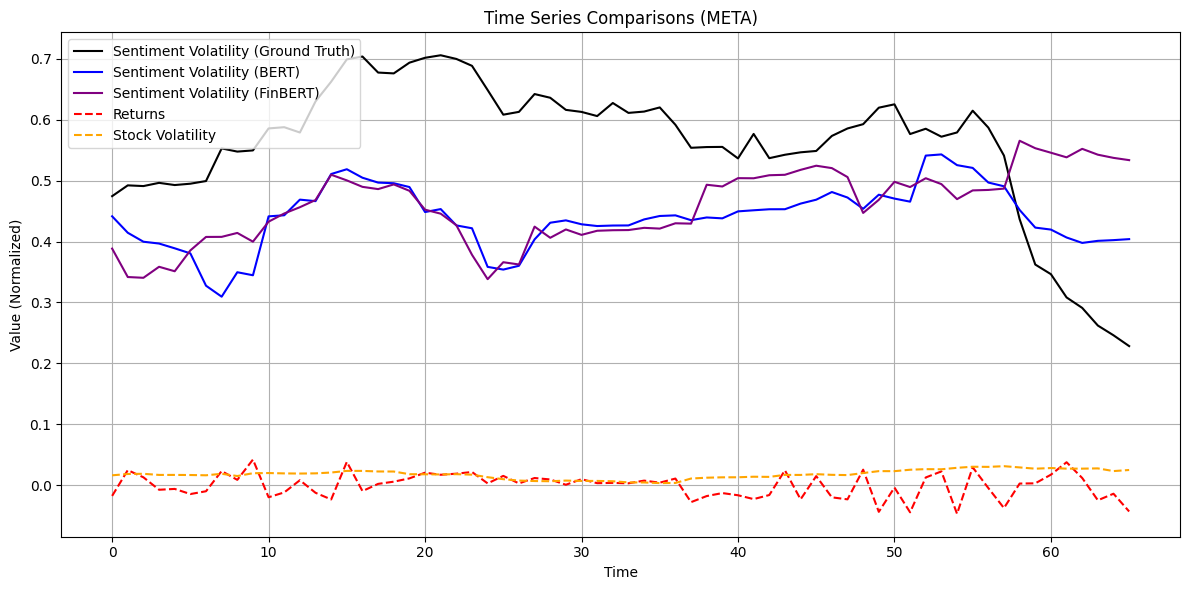

In [ ]:
plot_df = time_series_by_ticker[0]
plt.figure(figsize=(12, 6))
plt.plot(plot_df.index, plot_df['ground_truth_std'], label='Sentiment Volatility (Ground Truth)', color='black', linestyle='-')
plt.plot(plot_df.index, plot_df['finetuned_bert_std'], label='Sentiment Volatility (BERT)', color='blue', linestyle='-')
plt.plot(plot_df.index, plot_df['finetuned_finbert_std'], label='Sentiment Volatility (FinBERT)', color='purple', linestyle='-')
plt.plot(plot_df.index, plot_df['Return'], label='Returns', color='red', linestyle='--')
plt.plot(plot_df.index, plot_df['Volatility'], label='Stock Volatility', color='orange', linestyle='--')
# Exclude Log_Volume because its scale is clearly different

plt.title(f'Time Series Comparisons ({ticker_list[0]})')
plt.xlabel('Time')
plt.ylabel('Value (Normalized)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Get a list of all numerical columns in the time series
numerical_columns = time_series_by_ticker[0].select_dtypes(include=[np.number]).columns.tolist()

# Remove 'Close' & 'Volume'
numerical_columns = [x for x in numerical_columns if x not in ['Close', 'Volume']]
numerical_columns

['Return',
 'Volatility',
 'Log_Volume',
 'ground_truth_avg',
 'ground_truth_std',
 'finetuned_bert_avg',
 'finetuned_bert_std',
 'finetuned_finbert_avg',
 'finetuned_finbert_std']

In [ ]:
# Standardize all the variables in each time series
from sklearn.preprocessing import StandardScaler

for time_series in time_series_by_ticker:
    scaler = StandardScaler()
    time_series[numerical_columns] = scaler.fit_transform(time_series[numerical_columns])

<ipython-input-48-8c0e30126630>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series[numerical_columns] = scaler.fit_transform(time_series[numerical_columns])
<ipython-input-48-8c0e30126630>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series[numerical_columns] = scaler.fit_transform(time_series[numerical_columns])
<ipython-input-48-8c0e30126630>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [ ]:
time_series_by_ticker[0].head()

,Date,Close,Volume,Ticker,Return,Volatility,Log_Volume,ground_truth_avg,ground_truth_std,finetuned_bert_avg,finetuned_bert_std,finetuned_finbert_avg,finetuned_finbert_std
Step,,,,,,,,,,,,,
0,2024-12-20,584.729797,48989400,META,-0.827528,-0.233088,3.085038,1.947380,-0.764953,1.060456,0.040093,0.910617,-1.174085
1,2024-12-23,599.316772,10205800,META,1.222066,0.068015,-0.949342,1.469106,-0.604880,1.343873,-0.504231,1.406701,-1.962376
2,2024-12-24,607.209778,4726100,META,0.651104,0.108431,-2.929322,1.512768,-0.615552,1.480785,-0.800678,1.386060,-1.983700
3,2024-12-26,602.813660,6081400,META,-0.338430,-0.141500,-2.280861,1.281944,-0.567745,1.418942,-0.861132,1.311109,-1.678218
4,2024-12-27,599.276855,8084200,META,-0.271877,-0.142115,-1.548706,1.449405,-0.600315,1.488960,-1.018794,1.304520,-1.802387


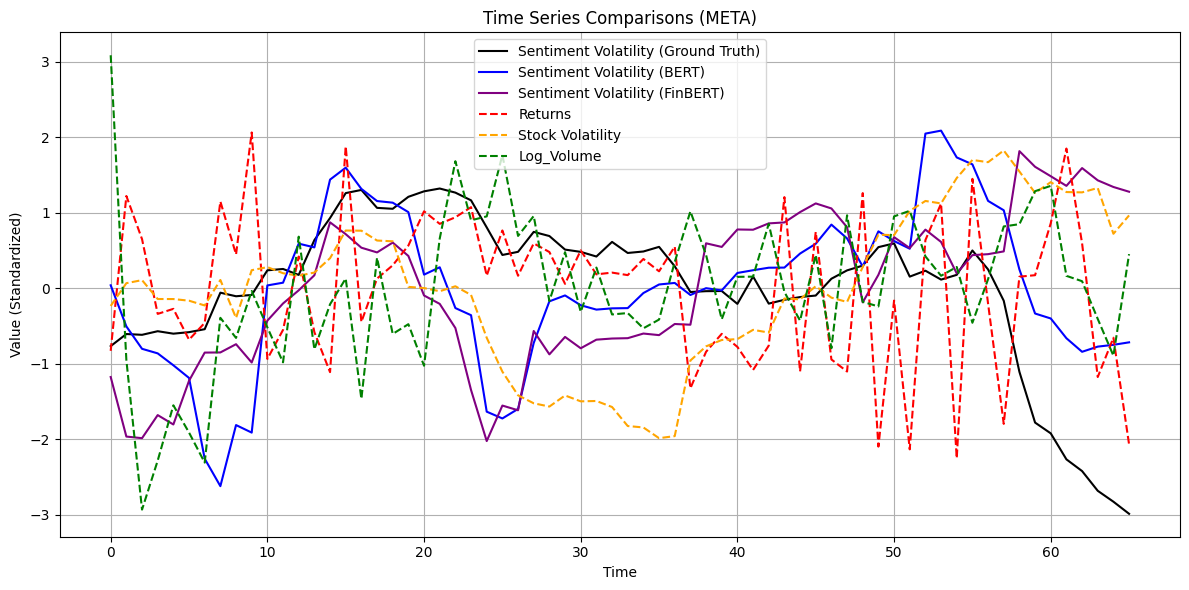

In [ ]:
# Plot the variables again
plot_df = time_series_by_ticker[0]
plt.figure(figsize=(12, 6))
plt.plot(plot_df.index, plot_df['ground_truth_std'], label='Sentiment Volatility (Ground Truth)', color='black', linestyle='-')
plt.plot(plot_df.index, plot_df['finetuned_bert_std'], label='Sentiment Volatility (BERT)', color='blue', linestyle='-')
plt.plot(plot_df.index, plot_df['finetuned_finbert_std'], label='Sentiment Volatility (FinBERT)', color='purple', linestyle='-')
plt.plot(plot_df.index, plot_df['Return'], label='Returns', color='red', linestyle='--')
plt.plot(plot_df.index, plot_df['Volatility'], label='Stock Volatility', color='orange', linestyle='--')
plt.plot(plot_df.index, plot_df['Log_Volume'], label='Log_Volume', color='green', linestyle='--')

plt.title(f'Time Series Comparisons ({ticker_list[0]})')
plt.xlabel('Time')
plt.ylabel('Value (Standardized)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

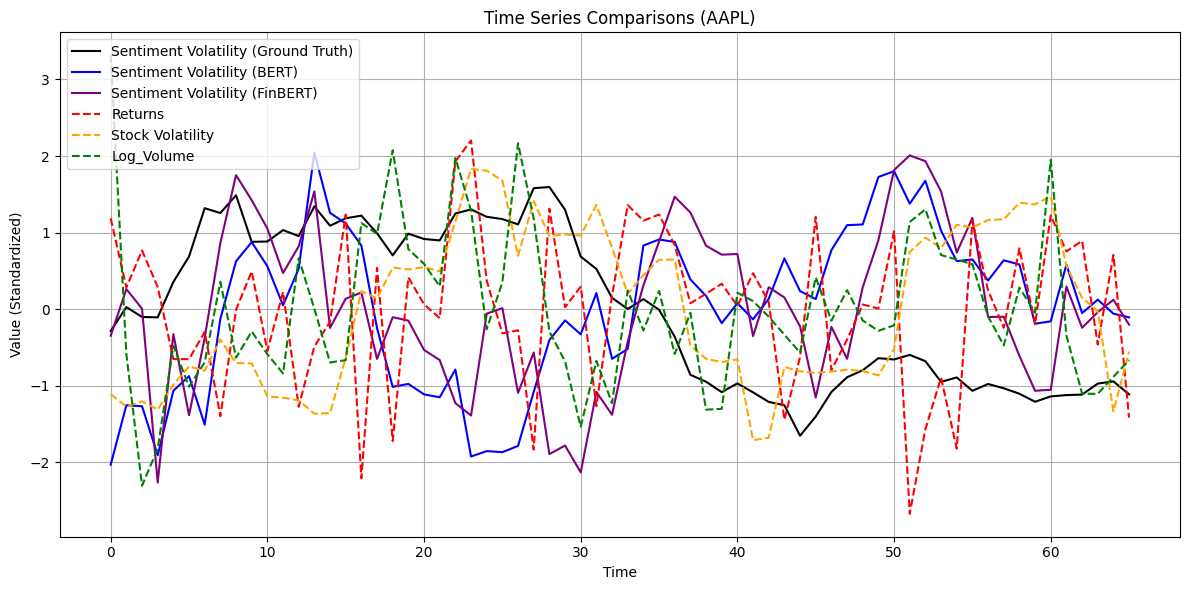

In [ ]:
plot_df = time_series_by_ticker[1]
plt.figure(figsize=(12, 6))
plt.plot(plot_df.index, plot_df['ground_truth_std'], label='Sentiment Volatility (Ground Truth)', color='black', linestyle='-')
plt.plot(plot_df.index, plot_df['finetuned_bert_std'], label='Sentiment Volatility (BERT)', color='blue', linestyle='-')
plt.plot(plot_df.index, plot_df['finetuned_finbert_std'], label='Sentiment Volatility (FinBERT)', color='purple', linestyle='-')
plt.plot(plot_df.index, plot_df['Return'], label='Returns', color='red', linestyle='--')
plt.plot(plot_df.index, plot_df['Volatility'], label='Stock Volatility', color='orange', linestyle='--')
plt.plot(plot_df.index, plot_df['Log_Volume'], label='Log_Volume', color='green', linestyle='--')

plt.title(f'Time Series Comparisons ({ticker_list[1]})')
plt.xlabel('Time')
plt.ylabel('Value (Standardized)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

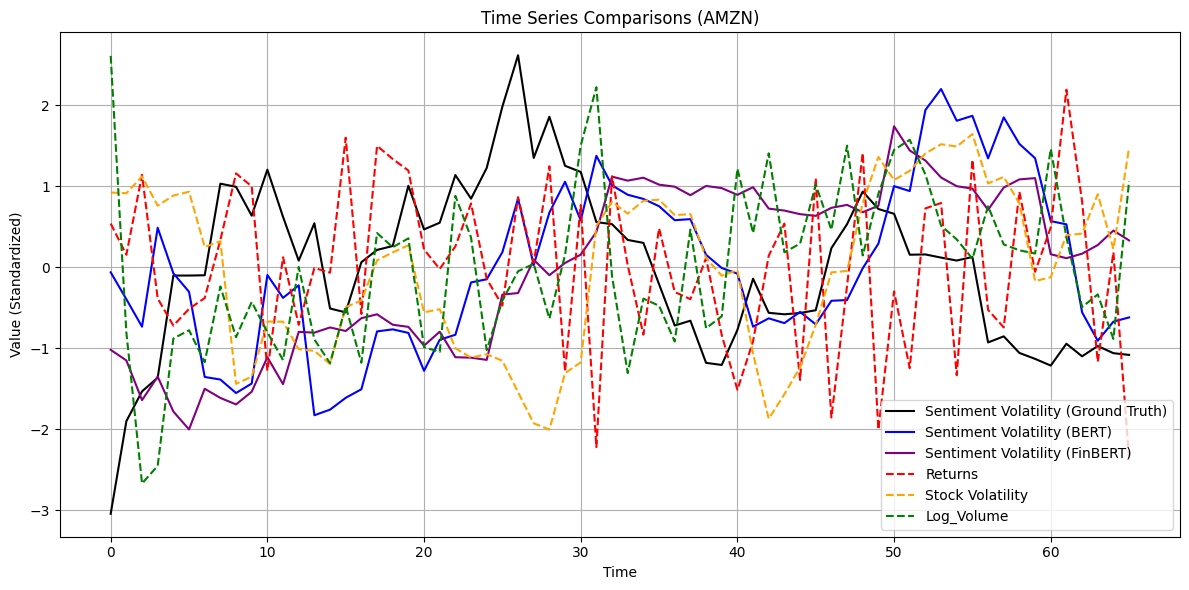

In [ ]:
plot_df = time_series_by_ticker[2]
plt.figure(figsize=(12, 6))
plt.plot(plot_df.index, plot_df['ground_truth_std'], label='Sentiment Volatility (Ground Truth)', color='black', linestyle='-')
plt.plot(plot_df.index, plot_df['finetuned_bert_std'], label='Sentiment Volatility (BERT)', color='blue', linestyle='-')
plt.plot(plot_df.index, plot_df['finetuned_finbert_std'], label='Sentiment Volatility (FinBERT)', color='purple', linestyle='-')
plt.plot(plot_df.index, plot_df['Return'], label='Returns', color='red', linestyle='--')
plt.plot(plot_df.index, plot_df['Volatility'], label='Stock Volatility', color='orange', linestyle='--')
plt.plot(plot_df.index, plot_df['Log_Volume'], label='Log_Volume', color='green', linestyle='--')

plt.title(f'Time Series Comparisons ({ticker_list[2]})')
plt.xlabel('Time')
plt.ylabel('Value (Standardized)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

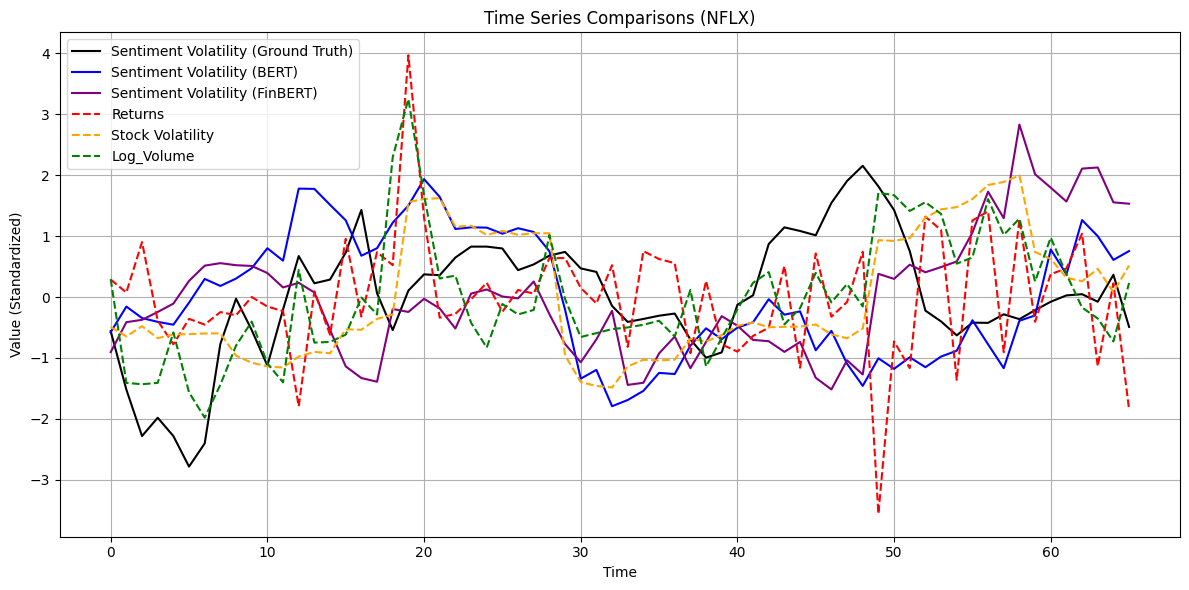

In [ ]:
plot_df = time_series_by_ticker[3]
plt.figure(figsize=(12, 6))
plt.plot(plot_df.index, plot_df['ground_truth_std'], label='Sentiment Volatility (Ground Truth)', color='black', linestyle='-')
plt.plot(plot_df.index, plot_df['finetuned_bert_std'], label='Sentiment Volatility (BERT)', color='blue', linestyle='-')
plt.plot(plot_df.index, plot_df['finetuned_finbert_std'], label='Sentiment Volatility (FinBERT)', color='purple', linestyle='-')
plt.plot(plot_df.index, plot_df['Return'], label='Returns', color='red', linestyle='--')
plt.plot(plot_df.index, plot_df['Volatility'], label='Stock Volatility', color='orange', linestyle='--')
plt.plot(plot_df.index, plot_df['Log_Volume'], label='Log_Volume', color='green', linestyle='--')

plt.title(f'Time Series Comparisons ({ticker_list[3]})')
plt.xlabel('Time')
plt.ylabel('Value (Standardized)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

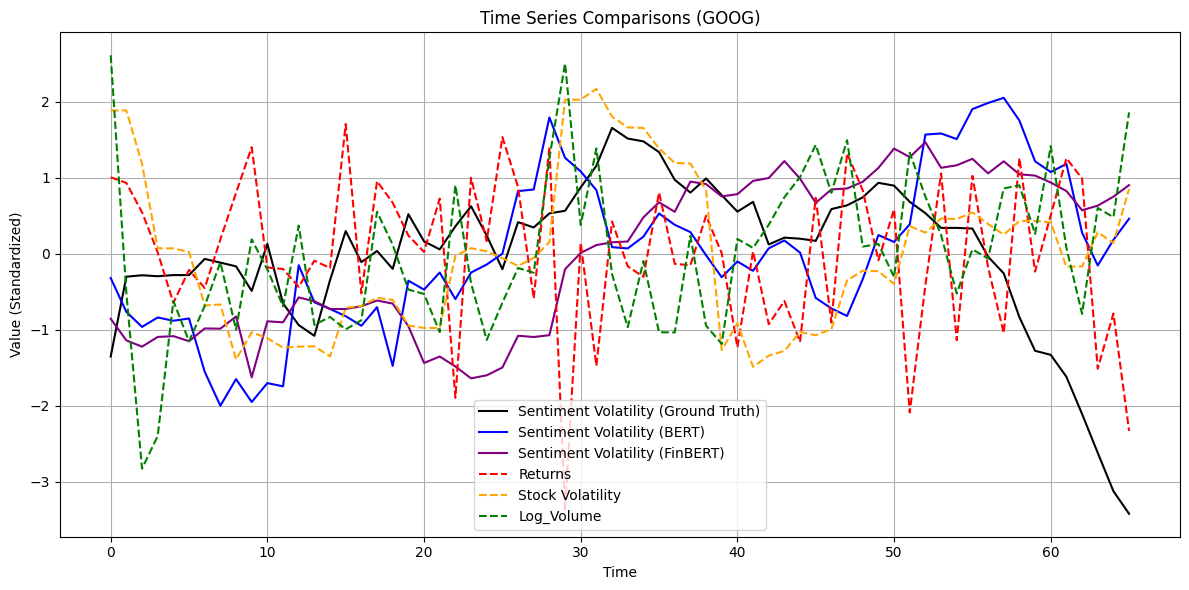

In [ ]:
plot_df = time_series_by_ticker[4]
plt.figure(figsize=(12, 6))
plt.plot(plot_df.index, plot_df['ground_truth_std'], label='Sentiment Volatility (Ground Truth)', color='black', linestyle='-')
plt.plot(plot_df.index, plot_df['finetuned_bert_std'], label='Sentiment Volatility (BERT)', color='blue', linestyle='-')
plt.plot(plot_df.index, plot_df['finetuned_finbert_std'], label='Sentiment Volatility (FinBERT)', color='purple', linestyle='-')
plt.plot(plot_df.index, plot_df['Return'], label='Returns', color='red', linestyle='--')
plt.plot(plot_df.index, plot_df['Volatility'], label='Stock Volatility', color='orange', linestyle='--')
plt.plot(plot_df.index, plot_df['Log_Volume'], label='Log_Volume', color='green', linestyle='--')

plt.title(f'Time Series Comparisons ({ticker_list[4]})')
plt.xlabel('Time')
plt.ylabel('Value (Standardized)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The standardized data seems to be ready for analysis

# 4. Causality/Correlation tests

In [ ]:
!pip install statsmodels

## 4.1. Check for assumption: Stationarity



In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def adf_test(series, name):
    result = adfuller(series)
    print(f"{name}: p-value = {result[1]:.4f} → {'Stationary ✅' if result[1] < 0.05 else 'Non-stationary ❌'}")

for i in range(len(ticker_list)):
    print(f'Ticker: {ticker_list[i]}')
    adf_test(time_series_by_ticker[i]['Return'], 'Return')
    adf_test(time_series_by_ticker[i]['Volatility'], 'Volatility')
    adf_test(time_series_by_ticker[i]['Log_Volume'], 'Log_Volume')
    print('\n')

    adf_test(time_series_by_ticker[i]['ground_truth_avg'], 'ground_truth_avg')
    adf_test(time_series_by_ticker[i]['ground_truth_std'], 'ground_truth_std')
    print('\n')

    adf_test(time_series_by_ticker[i]['finetuned_bert_avg'], 'finetuned_bert_avg')
    adf_test(time_series_by_ticker[i]['finetuned_bert_std'], 'finetuned_bert_std')
    print('\n')

    adf_test(time_series_by_ticker[i]['finetuned_finbert_avg'], 'finetuned_finbert_avg')
    adf_test(time_series_by_ticker[i]['finetuned_finbert_std'], 'finetuned_finbert_std')
    print('\n')

Ticker: META
Return: p-value = 0.0035 → Stationary ✅
Volatility: p-value = 0.2017 → Non-stationary ❌
Log_Volume: p-value = 0.0000 → Stationary ✅


ground_truth_avg: p-value = 0.9834 → Non-stationary ❌
ground_truth_std: p-value = 0.9678 → Non-stationary ❌


finetuned_bert_avg: p-value = 0.9009 → Non-stationary ❌
finetuned_bert_std: p-value = 0.0375 → Stationary ✅


finetuned_finbert_avg: p-value = 0.9213 → Non-stationary ❌
finetuned_finbert_std: p-value = 0.4975 → Non-stationary ❌


Ticker: AAPL
Return: p-value = 0.0000 → Stationary ✅
Volatility: p-value = 0.0254 → Stationary ✅
Log_Volume: p-value = 0.0000 → Stationary ✅


ground_truth_avg: p-value = 0.0076 → Stationary ✅
ground_truth_std: p-value = 0.8544 → Non-stationary ❌


finetuned_bert_avg: p-value = 0.9448 → Non-stationary ❌
finetuned_bert_std: p-value = 0.3991 → Non-stationary ❌


finetuned_finbert_avg: p-value = 0.2384 → Non-stationary ❌
finetuned_finbert_std: p-value = 0.5534 → Non-stationary ❌


Ticker: AMZN
Return: p-value =

We find that for the tickers involved, returns and log_volume are usually stationary, while stock volatility, sentiment scores & sentiment volatility are not

In [ ]:
# Cointegration checks
from statsmodels.tsa.stattools import coint

def coint_test(series1, series2, name1, name2):
    result = coint(series1, series2)
    print(f"{name1} & {name2}: p-value = {result[1]:.4f} → {'Cointegrated ✅' if result[1] < 0.05 else 'Not Cointegrated ❌'}")

for i in range(len(ticker_list)):
    print(f'Ticker: {ticker_list[i]}')
    coint_test(time_series_by_ticker[i]['ground_truth_std'], time_series_by_ticker[i]['Return'], 'ground_truth_std', 'Return')
    coint_test(time_series_by_ticker[i]['ground_truth_std'], time_series_by_ticker[i]['Volatility'], 'ground_truth_std', 'Volatility')
    coint_test(time_series_by_ticker[i]['ground_truth_std'], time_series_by_ticker[i]['Log_Volume'], 'ground_truth_std', 'Log_Volume')
    print('\n')

    coint_test(time_series_by_ticker[i]['finetuned_bert_std'], time_series_by_ticker[i]['Return'], 'finetuned_bert_std', 'Return')
    coint_test(time_series_by_ticker[i]['finetuned_bert_std'], time_series_by_ticker[i]['Volatility'], 'finetuned_bert_std', 'Volatility')
    coint_test(time_series_by_ticker[i]['finetuned_bert_std'], time_series_by_ticker[i]['Log_Volume'], 'finetuned_bert_std', 'Log_Volume')
    print('\n')

    coint_test(time_series_by_ticker[i]['finetuned_finbert_std'], time_series_by_ticker[i]['Return'], 'finetuned_finbert_std', 'Return')
    coint_test(time_series_by_ticker[i]['finetuned_finbert_std'], time_series_by_ticker[i]['Volatility'], 'finetuned_finbert_std', 'Volatility')
    coint_test(time_series_by_ticker[i]['finetuned_finbert_std'], time_series_by_ticker[i]['Log_Volume'], 'finetuned_finbert_std', 'Log_Volume')
    print('\n')

Ticker: META
ground_truth_std & Return: p-value = 0.8933 → Not Cointegrated ❌
ground_truth_std & Volatility: p-value = 0.1577 → Not Cointegrated ❌
ground_truth_std & Log_Volume: p-value = 0.9354 → Not Cointegrated ❌


finetuned_bert_std & Return: p-value = 0.5013 → Not Cointegrated ❌
finetuned_bert_std & Volatility: p-value = 0.1138 → Not Cointegrated ❌
finetuned_bert_std & Log_Volume: p-value = 0.3278 → Not Cointegrated ❌


finetuned_finbert_std & Return: p-value = 0.1814 → Not Cointegrated ❌
finetuned_finbert_std & Volatility: p-value = 0.5322 → Not Cointegrated ❌
finetuned_finbert_std & Log_Volume: p-value = 0.4919 → Not Cointegrated ❌


Ticker: AAPL
ground_truth_std & Return: p-value = 0.9311 → Not Cointegrated ❌
ground_truth_std & Volatility: p-value = 0.9254 → Not Cointegrated ❌
ground_truth_std & Log_Volume: p-value = 0.9015 → Not Cointegrated ❌


finetuned_bert_std & Return: p-value = 0.7460 → Not Cointegrated ❌
finetuned_bert_std & Volatility: p-value = 0.6109 → Not Cointegrat

=> Sentiment volatility is largely not cointegrated with returns, volatility or volume!

## 4.2. Evaluate the correlations

In [ ]:
def plot_avg_lagged_corr(sentiment_col, df, lags=range(-10, 11)):
    targets = ['Return', 'Volatility', 'Log_Volume']

    # Container for storing results
    all_corrs = []

    for time_series in time_series_by_ticker:
        lagged_corr = pd.DataFrame(index=lags, columns=targets)

        for lag in lags:
            shifted_sent = time_series[sentiment_col].shift(lag)
            for target in targets:
                corr = df[target].corr(shifted_sent)
                lagged_corr.loc[lag, target] = corr

        lagged_corr = lagged_corr.astype(float)
        all_corrs.append(lagged_corr)

    # Average across all stocks
    avg_corr = sum(all_corrs) / len(all_corrs)
    avg_corr = avg_corr.T  # Transpose to have targets as rows

    # Plot the heatmap
    plt.figure(figsize=(10, 4))
    sns.heatmap(avg_corr, annot=True, fmt=".2f", cmap='coolwarm', center=0,
                cbar_kws={"shrink": 0.8})
    plt.title(f"Avg. Lagged Correlation: {sentiment_col} → Stock Features")
    plt.xlabel("Lag (days)")
    plt.ylabel("Target Variable")
    plt.tight_layout()
    plt.show()

    return avg_corr  # Optional: return the matrix for further analysis


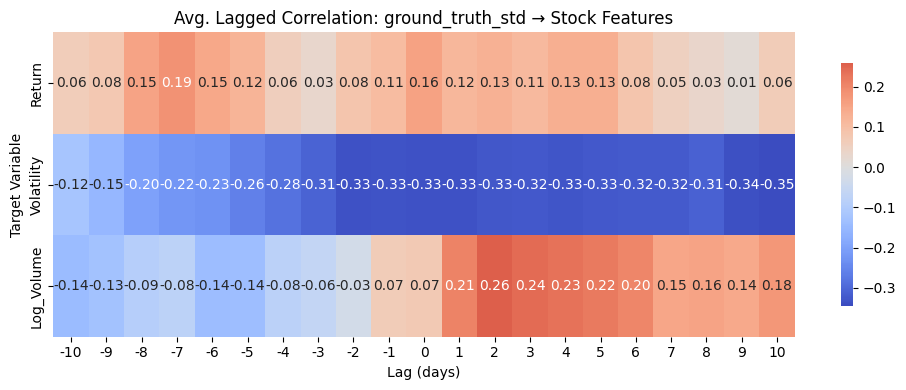

In [ ]:
ground_truth_corr = plot_avg_lagged_corr("ground_truth_std", time_series_by_ticker[0])

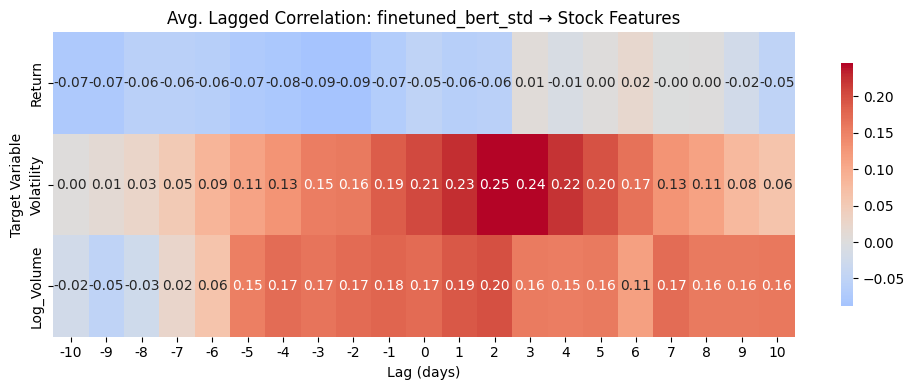

In [ ]:
finetuned_bert_corr = plot_avg_lagged_corr("finetuned_bert_std", time_series_by_ticker[0])

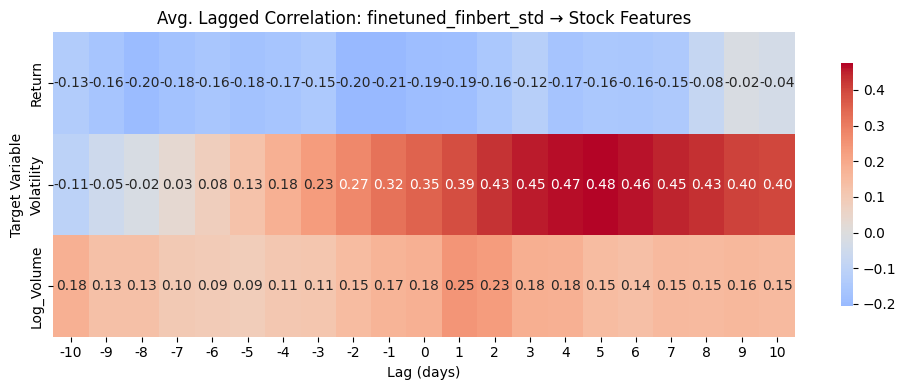

In [ ]:
finetuned_finbert_corr = plot_avg_lagged_corr("finetuned_finbert_std", time_series_by_ticker[0])

# 5. Predictive Optimization: LSTM

In [ ]:
# Load the dataset
merged_time_series = pd.read_csv("data/merged/time_series_data.csv")
merged_time_series.head()

,Step,Date,Close,Volume,Ticker,Return,Volatility,Log_Volume,ground_truth_avg,ground_truth_std,finetuned_bert_avg,finetuned_bert_std,finetuned_finbert_avg,finetuned_finbert_std
0,0,2024-12-20,584.729797,48989400,META,-0.017328,0.016439,17.707115,0.657895,0.474415,0.677050,0.441380,0.715528,0.388403
1,1,2024-12-23,599.316772,10205800,META,0.024947,0.018633,16.138467,0.588235,0.492153,0.705267,0.414385,0.778231,0.341756
2,2,2024-12-24,607.209778,4726100,META,0.013170,0.018927,15.368611,0.594595,0.490970,0.718899,0.399683,0.775622,0.340495
3,3,2024-12-26,602.813660,6081400,META,-0.007240,0.017106,15.620746,0.560976,0.496268,0.712741,0.396684,0.766148,0.358571
4,4,2024-12-27,599.276855,8084200,META,-0.005867,0.017102,15.905422,0.585366,0.492659,0.719713,0.388865,0.765315,0.351224


In [ ]:
merged_time_series['Ticker'].value_counts()

,count
Ticker,
META,66
AAPL,66
AMZN,66
NFLX,66
GOOG,66


I will use the first 51 time steps for training and the last 15 time steps for testing

## 5.1. Setup

In [ ]:
# Set a particular seed for torch to ensure reproducibility
import torch
import random

def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(83)

In [ ]:
# Create a list of our target features (unchanging)
target_features = ["Return", "Volatility", "Log_Volume"]

# Set the number of lags & number of test samples
n_lags = 5 # Predict based on 5 previous samples
n_test = 15 # Test on 15 samples

In [ ]:
# Function to create standardized lagged features in the LSTM expected shape
# Standardized train set != Standardized entire set (what we did above)
from sklearn.preprocessing import StandardScaler

# Function to create standardized lagged features in the LSTM expected shape
def create_lagged_features_standardized(df, input_features, target_features, n_lags, n_test, ticker_list):
    X_train, y_train, X_test, y_test = [], [], [], []

    for ticker in ticker_list:
        df_ticker = df[df["Ticker"] == ticker].sort_values("Step").reset_index(drop=True)

        # Split into train and test ranges
        df_train = df_ticker.iloc[:-n_test].copy()
        df_test = df_ticker.iloc[-n_test - n_lags:].copy()  # Include lags for test

        # Standardize input features using the train set only
        scaler = StandardScaler()
        df_train[input_features] = scaler.fit_transform(df_train[input_features])
        df_test[input_features] = scaler.transform(df_test[input_features])  # Same scaling as the train set

        # Concatenate standardized train & test for rolling lag windows
        df_ticker_scaled = pd.concat([df_train, df_test], axis=0).reset_index(drop=True)

        # Create lagged training data
        X_t, y_t = [], []
        for i in range(n_lags, len(df_train)):
            x_row = df_ticker_scaled.loc[i - n_lags:i - 1, input_features].values
            # Reshape x_row to (n_lags, n_features)
            x_row = x_row.reshape(n_lags, len(input_features))
            y_row = df_ticker_scaled.loc[i, target_features].values
            X_t.append(x_row)
            y_t.append(y_row)

        # Create lagged testing data
        X_te, y_te = [], []
        for i in range(len(df_train), len(df_ticker_scaled)):
            x_row = df_ticker_scaled.loc[i - n_lags:i - 1, input_features].values
            # Reshape x_row to (n_lags, n_features)
            x_row = x_row.reshape(n_lags, len(input_features))
            y_row = df_ticker_scaled.loc[i, target_features].values
            X_te.append(x_row)
            y_te.append(y_row)

        # Convert to numpy arrays and append to final lists
        X_train.append(np.array(X_t))  # Shape: (samples, sequence_length, n_features)
        y_train.append(np.array(y_t))  # Shape: (samples, output_size)
        X_test.append(np.array(X_te))  # Shape: (samples, sequence_length, n_features)
        y_test.append(np.array(y_te))  # Shape: (samples, output_size)

    # Stack all tickers to form final input-output arrays for train and test
    # X_train = np.vstack(X_train)  # Shape: (total_samples, sequence_length, n_features)
    # y_train = np.vstack(y_train)  # Shape: (total_samples, output_size)
    # X_test = np.vstack(X_test)  # Shape: (total_samples, sequence_length, n_features)
    # y_test = np.vstack(y_test)  # Shape: (total_samples, output_size)

    return X_train, y_train, X_test, y_test

In [ ]:
# Define the LSTM model
import torch
import torch.nn as nn

class LSTMModel(nn.Module):
    def __init__(self, input_size=5, hidden_size=8, output_size=3, num_layers=1, sequence_length=10):
        super(LSTMModel, self).__init__()

        # Input size is the number of features, hidden size is the LSTM layer size, output size is the number of predictions
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)  # Linear layer to output the predictions
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.output_size = output_size
        self.input_size = input_size
        self.sequence_length = sequence_length

    def forward(self, x):
        # Initialize hidden state and cell state to zeros for each batch
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)  # hidden state
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)  # cell state

        # Forward pass through LSTM layer
        out, _ = self.lstm(x, (h0, c0))

        # We take the last time step's output from the sequence and feed it to the fully connected layer
        out = self.fc(out[:, -1, :])  # (batch_size, hidden_size) -> (batch_size, output_size)

        return out

In [ ]:
!pip install shap

In [ ]:
# Create a function to automate the training process
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import shap
import torch.optim as optim
import torch.nn as nn

def train_n_eval(X_train, y_train, X_test, y_test, n_lags=10, n_epochs=5, hidden_size=8):
    # Create a list of the results we're interested in
    maes = []
    rmses = []
    training_r2s = []
    r_squareds = []
    adjusted_r_squareds = []
    shap_values_list = []

    # Convert to numpy arrays with a consistent numeric type
    y_train = np.asarray(y_train, dtype=np.float32)  # Ensure the data is float32
    y_test = np.asarray(y_test, dtype=np.float32)  # Ensure the data is float32

    # Iterate over the tickers, assuming you have a list of tickers for X_train and X_test
    for i, ticker in enumerate(ticker_list):  # Iterating over tickers
        # Select the specific ticker's train and test data
        X_train_ticker = X_train[i]
        y_train_ticker = y_train[i]
        X_test_ticker = X_test[i]
        y_test_ticker = y_test[i]

        # Convert to tensors for the specific ticker
        X_train_tensor = torch.tensor(X_train_ticker, dtype=torch.float32)
        y_train_tensor = torch.tensor(y_train_ticker, dtype=torch.float32)
        X_test_tensor = torch.tensor(X_test_ticker, dtype=torch.float32)
        y_test_tensor = torch.tensor(y_test_ticker, dtype=torch.float32)

        # Define the criterion, the model, and the optimizer
        criterion = nn.MSELoss()
        model = LSTMModel(input_size=X_train_tensor.shape[2],  # Set input_size based on the data
                          hidden_size=hidden_size,
                          output_size=y_train_tensor.shape[1],  # Set output_size based on the target data
                          num_layers=1)
        optimizer = optim.Adam(model.parameters(), lr=0.001)

        # Train the model
        model.train()
        for epoch in range(n_epochs):
            optimizer.zero_grad()
            outputs = model(X_train_tensor)  # Forward pass
            loss = criterion(outputs, y_train_tensor)  # Loss computation
            loss.backward()  # Backward pass
            optimizer.step()  # Optimization step

        # Evaluate the model
        model.eval()
        with torch.no_grad():
            predictions = model(X_test_tensor)

            # Calculate MAE, RMSE, R^2
            mae = mean_absolute_error(y_test_tensor.numpy(), predictions.numpy())
            mse = mean_squared_error(y_test_tensor.numpy(), predictions.numpy())
            rmse = np.sqrt(mse)
            training_r2 = r2_score(y_train_tensor.numpy(), model(X_train_tensor).detach().numpy())
            r2 = r2_score(y_test_tensor.numpy(), predictions.numpy())

            # Calculate Adjusted R^2
            n = y_test_tensor.shape[0]  # Number of samples
            p = X_test_tensor.shape[2]  # Number of predictors (features)
            adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

        # Append results
        maes.append(mae)
        rmses.append(rmse)
        training_r2s.append(training_r2)
        r_squareds.append(r2)
        adjusted_r_squareds.append(adjusted_r2)

        # Define the SHAP GradientExplainer using the entire test set as background data
        explainer = shap.GradientExplainer(model, X_test_tensor)  # Using all samples as background

        # Calculate SHAP values
        shap_values = explainer.shap_values(X_test_tensor)

        # Calculate SHAP values
        shap_values_list.append(shap_values)

    # Average over all tickers
    avg_mae = np.mean(maes)
    avg_rmse = np.mean(rmses)
    avg_training_r2 = np.mean(training_r2s)
    avg_r_squared = np.mean(r_squareds)
    avg_adjusted_r2 = np.mean(adjusted_r_squareds)

    # Average total SHAP values
    avg_shap_values = np.mean(np.array(shap_values), axis=0) # Average over 5 tickers
    avg_shap_values = np.sum(avg_shap_values, axis=0) # Sum over the days

    return avg_mae, avg_rmse, avg_training_r2, avg_r_squared, avg_adjusted_r2, avg_shap_values

In [ ]:
# Create a list to store the metrics
metrics = []

## 5.2. Only basic stock features

In [ ]:
input_features = ["Return", "Volatility", "Log_Volume"]

In [ ]:
X_train, y_train, X_test, y_test = create_lagged_features_standardized(
    merged_time_series, input_features, target_features, n_lags=n_lags, n_test=n_test, ticker_list=ticker_list
)

In [ ]:
X_train[0].shape, y_train[0].shape, X_test[0].shape, y_test[0].shape # Format: (no. samples for train/test, no. features)

((46, 5, 3), (46, 3), (20, 5, 3), (20, 3))

In [ ]:
# Append the results to the list of results for 3 cases of model sizes
metrics.append(train_n_eval(X_train, y_train, X_test, y_test, n_lags=n_lags, n_epochs=10, hidden_size=16))
metrics.append(train_n_eval(X_train, y_train, X_test, y_test, n_lags=n_lags, n_epochs=50, hidden_size=64))
metrics.append(train_n_eval(X_train, y_train, X_test, y_test, n_lags=n_lags, n_epochs=100, hidden_size=256))

In [ ]:
metrics

[(np.float64(0.9700425744056702),
  np.float64(1.1794301053577583),
  np.float64(-0.008441205881536008),
  np.float64(-1.0692937828600406),
  np.float64(-1.4572863671462983),
  array([[ 4.87360133e-04, -7.85547037e-05,  5.19717401e-04],
         [ 1.22573238e-04,  8.65186670e-05, -4.15065194e-05],
         [-6.60566717e-05,  1.15806696e-04,  9.66048218e-05]])),
 (np.float64(0.7725973486900329),
  np.float64(0.9800417111872699),
  np.float64(0.31520805358886717),
  np.float64(-0.1391950599849224),
  np.float64(-0.35279413373209534),
  array([[-0.00042308, -0.00043128,  0.00013468],
         [ 0.00059307, -0.00145189,  0.00069905],
         [-0.00012385,  0.00243007,  0.0006821 ]])),
 (np.float64(0.9806715250015259),
  np.float64(1.27370948148684),
  np.float64(0.8383260011672974),
  np.float64(-1.0853244721889497),
  np.float64(-1.4763228107243775),
  array([[-0.03071765,  0.0005076 ,  0.00799376],
         [-0.00956226, -0.00259553,  0.00824343],
         [-0.00488337, -0.00164803, -0.

## 5.3. Basic stock features + ground_truths

In [ ]:
input_features = ["Return", "Volatility", "Log_Volume", "ground_truth_avg", "ground_truth_std"]

In [ ]:
X_train, y_train, X_test, y_test = create_lagged_features_standardized(
    merged_time_series, input_features, target_features, n_lags=n_lags, n_test=n_test, ticker_list=ticker_list
)

In [ ]:
X_train[0].shape, y_train[0].shape, X_test[0].shape, y_test[0].shape # Format: (no. samples for train/test, no. features)

((46, 5, 5), (46, 3), (20, 5, 5), (20, 3))

In [ ]:
# Append the results to the list of results for 3 cases
metrics.append(train_n_eval(X_train, y_train, X_test, y_test, n_lags=n_lags, n_epochs=10, hidden_size=16))
metrics.append(train_n_eval(X_train, y_train, X_test, y_test, n_lags=n_lags, n_epochs=50, hidden_size=64))
metrics.append(train_n_eval(X_train, y_train, X_test, y_test, n_lags=n_lags, n_epochs=100, hidden_size=256))

In [ ]:
metrics

[(np.float64(0.9700425744056702),
  np.float64(1.1794301053577583),
  np.float64(-0.008441205881536008),
  np.float64(-1.0692937828600406),
  np.float64(-1.4572863671462983),
  array([[ 4.87360133e-04, -7.85547037e-05,  5.19717401e-04],
         [ 1.22573238e-04,  8.65186670e-05, -4.15065194e-05],
         [-6.60566717e-05,  1.15806696e-04,  9.66048218e-05]])),
 (np.float64(0.7725973486900329),
  np.float64(0.9800417111872699),
  np.float64(0.31520805358886717),
  np.float64(-0.1391950599849224),
  np.float64(-0.35279413373209534),
  array([[-0.00042308, -0.00043128,  0.00013468],
         [ 0.00059307, -0.00145189,  0.00069905],
         [-0.00012385,  0.00243007,  0.0006821 ]])),
 (np.float64(0.9806715250015259),
  np.float64(1.27370948148684),
  np.float64(0.8383260011672974),
  np.float64(-1.0853244721889497),
  np.float64(-1.4763228107243775),
  array([[-0.03071765,  0.0005076 ,  0.00799376],
         [-0.00956226, -0.00259553,  0.00824343],
         [-0.00488337, -0.00164803, -0.

## 5.4. Basic stock features + BERT


In [ ]:
input_features = ["Return", "Volatility", "Log_Volume", "finetuned_bert_avg", "finetuned_bert_std"]

In [ ]:
X_train, y_train, X_test, y_test = create_lagged_features_standardized(
    merged_time_series, input_features, target_features, n_lags=n_lags, n_test=n_test, ticker_list=ticker_list
)

In [ ]:
X_train[0].shape, y_train[0].shape, X_test[0].shape, y_test[0].shape # Format: (no. samples for train/test, no. features)

((46, 5, 5), (46, 3), (20, 5, 5), (20, 3))

In [ ]:
# Append the results to the list of results for 3 cases
metrics.append(train_n_eval(X_train, y_train, X_test, y_test, n_lags=n_lags, n_epochs=10, hidden_size=16))
metrics.append(train_n_eval(X_train, y_train, X_test, y_test, n_lags=n_lags, n_epochs=50, hidden_size=64))
metrics.append(train_n_eval(X_train, y_train, X_test, y_test, n_lags=n_lags, n_epochs=100, hidden_size=256))

In [ ]:
metrics

[(np.float64(0.9700425744056702),
  np.float64(1.1794301053577583),
  np.float64(-0.008441205881536008),
  np.float64(-1.0692937828600406),
  np.float64(-1.4572863671462983),
  array([[ 4.87360133e-04, -7.85547037e-05,  5.19717401e-04],
         [ 1.22573238e-04,  8.65186670e-05, -4.15065194e-05],
         [-6.60566717e-05,  1.15806696e-04,  9.66048218e-05]])),
 (np.float64(0.7725973486900329),
  np.float64(0.9800417111872699),
  np.float64(0.31520805358886717),
  np.float64(-0.1391950599849224),
  np.float64(-0.35279413373209534),
  array([[-0.00042308, -0.00043128,  0.00013468],
         [ 0.00059307, -0.00145189,  0.00069905],
         [-0.00012385,  0.00243007,  0.0006821 ]])),
 (np.float64(0.9806715250015259),
  np.float64(1.27370948148684),
  np.float64(0.8383260011672974),
  np.float64(-1.0853244721889497),
  np.float64(-1.4763228107243775),
  array([[-0.03071765,  0.0005076 ,  0.00799376],
         [-0.00956226, -0.00259553,  0.00824343],
         [-0.00488337, -0.00164803, -0.

## 5.5. Basic stock features + FinBERT


In [ ]:
input_features = ["Return", "Volatility", "Log_Volume", "finetuned_finbert_avg", "finetuned_finbert_std"]

In [ ]:
X_train, y_train, X_test, y_test = create_lagged_features_standardized(
    merged_time_series, input_features, target_features, n_lags=n_lags, n_test=n_test, ticker_list=ticker_list
)

In [ ]:
X_train[0].shape, y_train[0].shape, X_test[0].shape, y_test[0].shape # Format: (no. samples for train/test, no. features)

((46, 5, 5), (46, 3), (20, 5, 5), (20, 3))

In [ ]:
# Append the results to the list of results for 3 cases
metrics.append(train_n_eval(X_train, y_train, X_test, y_test, n_lags=n_lags, n_epochs=10, hidden_size=16))
metrics.append(train_n_eval(X_train, y_train, X_test, y_test, n_lags=n_lags, n_epochs=50, hidden_size=64))
metrics.append(train_n_eval(X_train, y_train, X_test, y_test, n_lags=n_lags, n_epochs=100, hidden_size=256))

In [ ]:
metrics

[(np.float64(0.9700425744056702),
  np.float64(1.1794301053577583),
  np.float64(-0.008441205881536008),
  np.float64(-1.0692937828600406),
  np.float64(-1.4572863671462983),
  array([[ 4.87360133e-04, -7.85547037e-05,  5.19717401e-04],
         [ 1.22573238e-04,  8.65186670e-05, -4.15065194e-05],
         [-6.60566717e-05,  1.15806696e-04,  9.66048218e-05]])),
 (np.float64(0.7725973486900329),
  np.float64(0.9800417111872699),
  np.float64(0.31520805358886717),
  np.float64(-0.1391950599849224),
  np.float64(-0.35279413373209534),
  array([[-0.00042308, -0.00043128,  0.00013468],
         [ 0.00059307, -0.00145189,  0.00069905],
         [-0.00012385,  0.00243007,  0.0006821 ]])),
 (np.float64(0.9806715250015259),
  np.float64(1.27370948148684),
  np.float64(0.8383260011672974),
  np.float64(-1.0853244721889497),
  np.float64(-1.4763228107243775),
  array([[-0.03071765,  0.0005076 ,  0.00799376],
         [-0.00956226, -0.00259553,  0.00824343],
         [-0.00488337, -0.00164803, -0.

## 5.6. Evaluations: Simply show all the R^2 scores

In [ ]:
all_r2_scores = pd.DataFrame([metric[2] for metric in metrics], columns=['Training_R^2'])
all_r2_scores

,Training_R^2
0,-0.008441
1,0.315208
2,0.838326
3,0.039499
4,0.390360
5,0.880278
6,-0.023632
7,0.395062
8,0.896338
9,0.003082


In [ ]:
all_r2_scores['R^2'] = [metric[3] for metric in metrics]
all_r2_scores['Adjusted_R^2'] = [metric[4] for metric in metrics]
all_r2_scores

,Training_R^2,R^2,Adjusted_R^2
0,-0.008441,-1.069294,-1.457286
1,0.315208,-0.139195,-0.352794
2,0.838326,-1.085324,-1.476323
3,0.039499,-1.027108,-1.751075
4,0.390360,-0.293243,-0.755115
5,0.880278,-1.993584,-3.062721
6,-0.023632,-1.242677,-2.043634
7,0.395062,-0.338938,-0.817130
8,0.896338,-2.553289,-3.822321
9,0.003082,-0.976852,-1.682871


In [ ]:
# Set the input feature set name: identical for every 3 consecutive rows
all_r2_scores['Input_Feature_Set'] = all_r2_scores.index // 3
all_r2_scores['Input_Feature_Set'] = all_r2_scores['Input_Feature_Set'].map(
    {0 : "stock_features",
     1 : "stock_features+ground_truth",
     2 : "stock_features+bert",
     3 : "stock_features+finbert"}
)
all_r2_scores

,Training_R^2,R^2,Adjusted_R^2,Input_Feature_Set
0,-0.008441,-1.069294,-1.457286,stock_features
1,0.315208,-0.139195,-0.352794,stock_features
2,0.838326,-1.085324,-1.476323,stock_features
3,0.039499,-1.027108,-1.751075,stock_features+ground_truth
4,0.390360,-0.293243,-0.755115,stock_features+ground_truth
5,0.880278,-1.993584,-3.062721,stock_features+ground_truth
6,-0.023632,-1.242677,-2.043634,stock_features+bert
7,0.395062,-0.338938,-0.817130,stock_features+bert
8,0.896338,-2.553289,-3.822321,stock_features+bert
9,0.003082,-0.976852,-1.682871,stock_features+finbert


In [ ]:
# Set the parameter set name: same parameter set every 3 rows
all_r2_scores['Parameter_Set'] = all_r2_scores.index % 3
all_r2_scores['Parameter_Set'] = all_r2_scores['Parameter_Set'].map(
    {0 : "10 epochs, 16 hidden dims",
     1 : "50 epochs, 64 hidden dims",
     2 : "100 epochs, 256 hidden dims"}
)
all_r2_scores

,Training_R^2,R^2,Adjusted_R^2,Input_Feature_Set,Parameter_Set
0,-0.008441,-1.069294,-1.457286,stock_features,"1 lag, 10 epochs, 16 hidden dims"
1,0.315208,-0.139195,-0.352794,stock_features,"1 lag, 50 epochs, 64 hidden dims"
2,0.838326,-1.085324,-1.476323,stock_features,"1 lag, 100 epochs, 256 hidden dims"
3,0.039499,-1.027108,-1.751075,stock_features+ground_truth,"1 lag, 10 epochs, 16 hidden dims"
4,0.390360,-0.293243,-0.755115,stock_features+ground_truth,"1 lag, 50 epochs, 64 hidden dims"
5,0.880278,-1.993584,-3.062721,stock_features+ground_truth,"1 lag, 100 epochs, 256 hidden dims"
6,-0.023632,-1.242677,-2.043634,stock_features+bert,"1 lag, 10 epochs, 16 hidden dims"
7,0.395062,-0.338938,-0.817130,stock_features+bert,"1 lag, 50 epochs, 64 hidden dims"
8,0.896338,-2.553289,-3.822321,stock_features+bert,"1 lag, 100 epochs, 256 hidden dims"
9,0.003082,-0.976852,-1.682871,stock_features+finbert,"1 lag, 10 epochs, 16 hidden dims"


In [ ]:
all_r2_scores = all_r2_scores[['Input_Feature_Set', 'Parameter_Set', 'Training_R^2', 'R^2', 'Adjusted_R^2']]
all_r2_scores

,Input_Feature_Set,Parameter_Set,Training_R^2,R^2,Adjusted_R^2
0,stock_features,"1 lag, 10 epochs, 16 hidden dims",-0.008441,-1.069294,-1.457286
1,stock_features,"1 lag, 50 epochs, 64 hidden dims",0.315208,-0.139195,-0.352794
2,stock_features,"1 lag, 100 epochs, 256 hidden dims",0.838326,-1.085324,-1.476323
3,stock_features+ground_truth,"1 lag, 10 epochs, 16 hidden dims",0.039499,-1.027108,-1.751075
4,stock_features+ground_truth,"1 lag, 50 epochs, 64 hidden dims",0.390360,-0.293243,-0.755115
5,stock_features+ground_truth,"1 lag, 100 epochs, 256 hidden dims",0.880278,-1.993584,-3.062721
6,stock_features+bert,"1 lag, 10 epochs, 16 hidden dims",-0.023632,-1.242677,-2.043634
7,stock_features+bert,"1 lag, 50 epochs, 64 hidden dims",0.395062,-0.338938,-0.817130
8,stock_features+bert,"1 lag, 100 epochs, 256 hidden dims",0.896338,-2.553289,-3.822321
9,stock_features+finbert,"1 lag, 10 epochs, 16 hidden dims",0.003082,-0.976852,-1.682871


In [ ]:
# Save the results
all_r2_scores.to_csv("stock_eval_metrics/lstm_r2.csv", index=False)

## 5.7. Demo: Showing the SHAP values for stock_features+ground_truth

In [ ]:
shap_values = metrics[4][5]

In [ ]:
shap_values

array([[ 1.04720869e-04,  1.87299209e-04,  1.84876160e-04],
       [ 7.34796875e-05,  8.24646018e-04, -6.90365484e-04],
       [-1.23753991e-04, -1.83404629e-03, -4.22862003e-04],
       [-1.13691710e-04, -2.71250892e-04,  3.04824488e-04],
       [-6.61739752e-05,  2.29456922e-03, -4.50834779e-04]])

In [ ]:
shap_df = pd.DataFrame(shap_values, columns=["Return", "Volatility", "Log_Volume"])
shap_df['Input/Output'] = ["Return", "Volatility", "Log_Volume", "ground_truth_avg", "ground_truth_std"]
shap_df

,Return,Volatility,Log_Volume,Input/Output
0,0.000105,0.000187,0.000185,Return
1,0.000073,0.000825,-0.000690,Volatility
2,-0.000124,-0.001834,-0.000423,Log_Volume
3,-0.000114,-0.000271,0.000305,ground_truth_avg
4,-0.000066,0.002295,-0.000451,ground_truth_std


In [ ]:
shap_df = shap_df.set_index('Input/Output')
shap_df

,Return,Volatility,Log_Volume
Input/Output,,,
Return,0.000105,0.000187,0.000185
Volatility,0.000073,0.000825,-0.000690
Log_Volume,-0.000124,-0.001834,-0.000423
ground_truth_avg,-0.000114,-0.000271,0.000305
ground_truth_std,-0.000066,0.002295,-0.000451


In [ ]:
# Save the result
shap_df.to_csv("stock_eval_metrics/shap_values.csv")

# 6. Predictions: Linear Regression

## 6.0. Setup

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Create a list of our target features (unchanging)
target_features = ["Return", "Volatility", "Log_Volume"]

# Set the number of lags & number of test samples
n_lags = 5 # Predict based on previous 5 samples (smaller to avoid overfitting)
n_test = 15 # Test on 15 samples

In [ ]:
def create_lagged_features_standardized(df, input_features, target_features, n_lags, n_test, ticker_list):
    X_train, y_train, X_test, y_test = [], [], [], []
    X_train_flat, y_train_flat, X_test_flat, y_test_flat = [], [], [], []

    for ticker in ticker_list:
        df_ticker = df[df["Ticker"] == ticker].sort_values("Step").reset_index(drop=True)

        # Split into train and test ranges
        df_train = df_ticker.iloc[:-n_test].copy()
        df_test = df_ticker.iloc[-n_test - n_lags:].copy()  # Include lags for test

        # Standardize input features using the train set only
        scaler_X = StandardScaler()
        # Fit on the input features of the training data
        scaler_X.fit(df_train[input_features])
        # Transform both train and test data using the fitted scaler
        df_train_scaled_inputs = scaler_X.transform(df_train[input_features])
        df_test_scaled_inputs = scaler_X.transform(df_test[input_features])

        # Standardize target features using the train set only
        scaler_y = StandardScaler()
        # Fit on the target features of the training data
        scaler_y.fit(df_train[target_features])
        # Transform both train and test data using the fitted scaler
        df_train_scaled_targets = scaler_y.transform(df_train[target_features])
        df_test_scaled_targets = scaler_y.transform(df_test[target_features])


        # Reconstruct dataframes with scaled values for easier indexing
        df_train_scaled = pd.DataFrame(df_train_scaled_inputs, columns=input_features, index=df_train.index)
        df_train_scaled[target_features] = df_train_scaled_targets

        df_test_scaled = pd.DataFrame(df_test_scaled_inputs, columns=input_features, index=df_test.index)
        df_test_scaled[target_features] = df_test_scaled_targets

        # Concatenate standardized train & test for rolling lag windows
        df_ticker_scaled = pd.concat([df_train_scaled, df_test_scaled], axis=0).reset_index(drop=True)

        # Create lagged training data
        X_t, y_t = [], []
        for i in range(n_lags, len(df_train)):
            # Flatten the lagged window of input features into a 1D array
            x_row = df_ticker_scaled.loc[i - n_lags:i - 1, input_features].values.flatten()
            y_row = df_ticker_scaled.loc[i, target_features].values
            X_t.append(x_row)
            y_t.append(y_row)

        # Create lagged testing data
        X_te, y_te = [], []
        # The test loop should start from the beginning of the test set
        # and end at the last possible index to form a window of size n_lags
        # for a prediction at index i. The last possible index is len(df_ticker_scaled) - 1.
        # The loop should go up to and including the index for the last prediction.
        # A window for index 'i' includes indices [i-n_lags, i-1].
        # So for the last prediction at index len(df_ticker_scaled) - 1, the window is
        # [len(df_ticker_scaled) - 1 - n_lags, len(df_ticker_scaled) - 2].
        # Thus, the loop for test data should iterate for each prediction point,
        # which are the last n_test points. These points are at indices
        # from len(df_train) to len(df_ticker_scaled) - 1.
        for i in range(len(df_train), len(df_ticker_scaled)):
            # Flatten the lagged window of input features into a 1D array
            x_row = df_ticker_scaled.loc[i - n_lags:i - 1, input_features].values.flatten()
            y_row = df_ticker_scaled.loc[i, target_features].values
            X_te.append(x_row)
            y_te.append(y_row)


        # Convert to numpy arrays and append to final lists for this ticker
        X_train.append(np.array(X_t))  # Shape: (samples, n_lags * n_features)
        y_train.append(np.array(y_t))  # Shape: (samples, output_size)
        X_test.append(np.array(X_te))  # Shape: (samples, n_lags * n_features)
        y_test.append(np.array(y_te))  # Shape: (samples, output_size)

    # Do not stack all tickers for Linear Regression, process them individually
    # in the train_n_eval function as originally intended.
    # The stacking logic from the previous LSTM version is removed.

    return X_train, y_train, X_test, y_test

In [ ]:
# Create a function that takes in the sets, trains the model and returns the metrics we need
def train_n_eval(X_train, y_train, X_test, y_test, n_lags=10, input_features=None, target_features=None):
    # Fit and evaluate model per ticker
    # Create a list of the results we're interested in
    coefs = []
    maes = []
    rmses = []
    training_r2s = []
    r2s = []
    adj_r2s = []
    residuals = []

    for i in range(len(X_train)): # same as len(ticker_list)
        model = LinearRegression()
        model = Ridge(alpha=0.1)

        X_i = X_train[i]
        y_i = y_train[i]

        # Ensure inputs are 2D
        X_i = np.squeeze(X_i)
        y_i = np.squeeze(y_i)

        model.fit(X_i, y_i)
        preds = model.predict(X_test[i])
        # X_train[i] and y_train[i] are now 2D numpy arrays for a single ticker
        # model.fit(X_train[i], y_train[i])
        # preds = model.predict(X_test[i])
        maes.append(mean_absolute_error(y_test[i], preds))
        rmses.append(np.sqrt(mean_squared_error(y_test[i], preds)))
        training_r2s.append(model.score(X_i, y_i))
        r2s.append(r2_score(y_test[i], preds))

        # Calculate Adjusted R^2 - Ensure enough samples (n) and features (p)
        n = y_test[i].shape[0]  # Number of samples for this ticker's test set
        p = X_test[i].shape[1]  # Number of predictors (features) in the flattened lagged input
        # Adjusted R^2 formula is valid only if n > p + 1
        if n > p + 1:
             adj_r2s.append(1 - (1 - r2_score(y_test[i], preds)) * (n - 1) / (n - p - 1))
        else:
             adj_r2s.append(np.nan) # Append NaN if adjusted R^2 is not applicable

        residuals.append(preds - y_test[i])

        # Averaging the coefficients of each lag for each input feature
        # Reshape from (n_targets, n_input_features * n_lags)
        # to (n_targets, n_input_features, n_lags)
        coef_matrix = model.coef_.reshape(len(target_features), len(input_features), n_lags)
        coef_avg_lag = coef_matrix.mean(axis=2) # Averaging over n_lags days
        coefs.append(coef_avg_lag)  # shape: (n_targets, n_input_features)

    # Averaging the residuals of each day across all tickers
    residuals = np.concatenate(residuals, axis=0)  # shape: (total_days_across_all_tickers, n_targets)

    # Mean residual per target variable
    avg_residuals = residuals.mean(axis=0)

    # Convert to arrays and compute averages
    avg_mae = np.mean(maes)
    avg_rmse = np.mean(rmses)
    avg_coef = np.mean(coefs, axis=0)
    avg_training_r2 = np.mean(training_r2s)
    avg_r2 = np.nanmean(r2s) # Use nanmean to ignore NaNs from adj_r2 calculation issue
    avg_adj_r2 = np.nanmean(adj_r2s) # Use nanmean to handle NaNs

    return (avg_mae, avg_rmse, avg_training_r2, avg_r2, avg_adj_r2, avg_coef, avg_residuals)

In [ ]:
# Create a list to store the metrics
metrics = []

## 6.1. Basic stock features only

In [ ]:
input_features = ["Return", "Volatility", "Log_Volume"]

In [ ]:
X_train, y_train, X_test, y_test = create_lagged_features_standardized(merged_time_series, input_features, target_features, n_lags=n_lags, n_test=n_test, ticker_list=ticker_list)

In [ ]:
X_train[0].shape, y_train[0].shape, X_test[0].shape, y_test[0].shape # Format: (no. samples for train/test, no. features)

((46, 15), (46, 3), (20, 15), (20, 3))

In [ ]:
# Append the results to a list of results
metrics.append(train_n_eval(X_train, y_train, X_test, y_test, n_lags=n_lags, input_features=input_features, target_features=target_features))

In [ ]:
metrics

[(np.float64(0.7801248553569761),
  np.float64(1.0420604543858378),
  np.float64(0.5825808594362837),
  np.float64(-0.17239950842537213),
  np.float64(-4.5688976650205175),
  array([[-0.06222124, -0.0501096 , -0.02409182],
         [ 0.01688896, -0.03723045,  0.19721813],
         [-0.02292591,  0.0527966 ,  0.07614892]]),
  array([-0.08071362, -0.09159007, -0.04502441]))]

## 6.2. Basic stock features + ground_truths

In [ ]:
input_features = ["Return", "Volatility", "Log_Volume", "ground_truth_avg", "ground_truth_std"]

In [ ]:
X_train, y_train, X_test, y_test = create_lagged_features_standardized(merged_time_series, input_features, target_features, n_lags=n_lags, n_test=n_test, ticker_list=ticker_list)

In [ ]:
X_train[0].shape, y_train[0].shape, X_test[0].shape, y_test[0].shape # Format: (no. samples for train/test, no. features)

((46, 25), (46, 3), (20, 25), (20, 3))

In [ ]:
# Append the results to a list of results
metrics.append(train_n_eval(X_train, y_train, X_test, y_test, n_lags=n_lags, input_features=input_features, target_features=target_features))

<ipython-input-407-e9b3bdd0a95d>:64: RuntimeWarning: Mean of empty slice
  avg_adj_r2 = np.nanmean(adj_r2s) # Use nanmean to handle NaNs


In [ ]:
metrics

[(np.float64(0.7801248553569761),
  np.float64(1.0420604543858378),
  np.float64(0.5825808594362837),
  np.float64(-0.17239950842537213),
  np.float64(-4.5688976650205175),
  array([[-0.06222124, -0.0501096 , -0.02409182],
         [ 0.01688896, -0.03723045,  0.19721813],
         [-0.02292591,  0.0527966 ,  0.07614892]]),
  array([-0.08071362, -0.09159007, -0.04502441])),
 (np.float64(0.9905691995499474),
  np.float64(1.290315383837763),
  np.float64(0.7412936006956213),
  np.float64(-1.0984384042274384),
  np.float64(nan),
  array([[ 0.04499475, -0.08700724,  0.02714289, -0.06473837,  0.03139449],
         [ 0.01981807, -0.04183478, -0.01214157,  0.0228241 ,  0.17112649],
         [ 0.12358076, -0.21038364, -0.00699312,  0.02497303,  0.03417857]]),
  array([-0.11797221,  0.1136139 ,  0.06442007]))]

## 6.3. Basic stock features + finetuned_bert

In [ ]:
input_features = ["Return", "Volatility", "Log_Volume", "finetuned_bert_avg", "finetuned_bert_std"]

In [ ]:
X_train, y_train, X_test, y_test = create_lagged_features_standardized(merged_time_series, input_features, target_features, n_lags=n_lags, n_test=n_test, ticker_list=ticker_list)

In [ ]:
X_train[0].shape, y_train[0].shape, X_test[0].shape, y_test[0].shape # Format: (no. samples for train/test, no. features)

((46, 25), (46, 3), (20, 25), (20, 3))

In [ ]:
# Append the results to a list of results
metrics.append(train_n_eval(X_train, y_train, X_test, y_test, n_lags=n_lags, input_features=input_features, target_features=target_features))

<ipython-input-407-e9b3bdd0a95d>:64: RuntimeWarning: Mean of empty slice
  avg_adj_r2 = np.nanmean(adj_r2s) # Use nanmean to handle NaNs


In [ ]:
metrics

[(np.float64(0.7801248553569761),
  np.float64(1.0420604543858378),
  np.float64(0.5825808594362837),
  np.float64(-0.17239950842537213),
  np.float64(-4.5688976650205175),
  array([[-0.06222124, -0.0501096 , -0.02409182],
         [ 0.01688896, -0.03723045,  0.19721813],
         [-0.02292591,  0.0527966 ,  0.07614892]]),
  array([-0.08071362, -0.09159007, -0.04502441])),
 (np.float64(0.9905691995499474),
  np.float64(1.290315383837763),
  np.float64(0.7412936006956213),
  np.float64(-1.0984384042274384),
  np.float64(nan),
  array([[ 0.04499475, -0.08700724,  0.02714289, -0.06473837,  0.03139449],
         [ 0.01981807, -0.04183478, -0.01214157,  0.0228241 ,  0.17112649],
         [ 0.12358076, -0.21038364, -0.00699312,  0.02497303,  0.03417857]]),
  array([-0.11797221,  0.1136139 ,  0.06442007])),
 (np.float64(1.3045694697962449),
  np.float64(1.7723768196684908),
  np.float64(0.7403399533516537),
  np.float64(-3.1703977058929356),
  np.float64(nan),
  array([[ 0.05112211, -0.031328

## 6.4. Basic stock features + finetuned_finbert

In [ ]:
input_features = ["Return", "Volatility", "Log_Volume", "finetuned_finbert_avg", "finetuned_finbert_std"]

In [ ]:
X_train, y_train, X_test, y_test = create_lagged_features_standardized(merged_time_series, input_features, target_features, n_lags=n_lags, n_test=n_test, ticker_list=ticker_list)

In [ ]:
X_train[0].shape, y_train[0].shape, X_test[0].shape, y_test[0].shape # Format: (no. samples for train/test, no. features)

((46, 25), (46, 3), (20, 25), (20, 3))

In [ ]:
# Append the results to a list of results
metrics.append(train_n_eval(X_train, y_train, X_test, y_test, n_lags=n_lags, input_features=input_features, target_features=target_features))

<ipython-input-407-e9b3bdd0a95d>:64: RuntimeWarning: Mean of empty slice
  avg_adj_r2 = np.nanmean(adj_r2s) # Use nanmean to handle NaNs


In [ ]:
metrics

[(np.float64(0.7801248553569761),
  np.float64(1.0420604543858378),
  np.float64(0.5825808594362837),
  np.float64(-0.17239950842537213),
  np.float64(-4.5688976650205175),
  array([[-0.06222124, -0.0501096 , -0.02409182],
         [ 0.01688896, -0.03723045,  0.19721813],
         [-0.02292591,  0.0527966 ,  0.07614892]]),
  array([-0.08071362, -0.09159007, -0.04502441])),
 (np.float64(0.9905691995499474),
  np.float64(1.290315383837763),
  np.float64(0.7412936006956213),
  np.float64(-1.0984384042274384),
  np.float64(nan),
  array([[ 0.04499475, -0.08700724,  0.02714289, -0.06473837,  0.03139449],
         [ 0.01981807, -0.04183478, -0.01214157,  0.0228241 ,  0.17112649],
         [ 0.12358076, -0.21038364, -0.00699312,  0.02497303,  0.03417857]]),
  array([-0.11797221,  0.1136139 ,  0.06442007])),
 (np.float64(1.3045694697962449),
  np.float64(1.7723768196684908),
  np.float64(0.7403399533516537),
  np.float64(-3.1703977058929356),
  np.float64(nan),
  array([[ 0.05112211, -0.031328

## 6.5. Save & Display the evaluation metrics

In [ ]:
metrics_df = pd.DataFrame(metrics, columns=['MAE', 'RMSE', 'Training_R^2', 'R^2', 'Adj_R^2', 'coefs', 'residuals'])
metrics_df

,MAE,RMSE,Training_R^2,R^2,Adj_R^2,coefs,residuals
0,0.780125,1.042060,0.582581,-0.172400,-4.568898,"[[-0.06222124175068618, -0.050109598071889985,...","[-0.08071361591123505, -0.0915900735991147, -0..."
1,0.990569,1.290315,0.741294,-1.098438,NaN,"[[0.04499475381481451, -0.08700723869157709, 0...","[-0.1179722083226285, 0.11361390012716063, 0.0..."
2,1.304569,1.772377,0.740340,-3.170398,NaN,"[[0.0511221097021289, -0.03132869281641272, 0....","[-0.9091782557036769, -0.05938148804443691, 0...."
3,1.065760,1.356041,0.743043,-1.144817,NaN,"[[-0.04723047187753531, -0.12053160792842152, ...","[-0.09989369487147468, -0.051475499868132865, ..."


In [ ]:
metrics_df['method'] = ['market_features', 'market_features+ground_truth', 'market_features+bert', 'market_features+finbert']
metrics_df.head()

,MAE,RMSE,Training_R^2,R^2,Adj_R^2,coefs,residuals,method
0,0.780125,1.042060,0.582581,-0.172400,-4.568898,"[[-0.06222124175068618, -0.050109598071889985,...","[-0.08071361591123505, -0.0915900735991147, -0...",market_features
1,0.990569,1.290315,0.741294,-1.098438,NaN,"[[0.04499475381481451, -0.08700723869157709, 0...","[-0.1179722083226285, 0.11361390012716063, 0.0...",market_features+ground_truth
2,1.304569,1.772377,0.740340,-3.170398,NaN,"[[0.0511221097021289, -0.03132869281641272, 0....","[-0.9091782557036769, -0.05938148804443691, 0....",market_features+bert
3,1.065760,1.356041,0.743043,-1.144817,NaN,"[[-0.04723047187753531, -0.12053160792842152, ...","[-0.09989369487147468, -0.051475499868132865, ...",market_features+finbert


In [ ]:
metrics_df = metrics_df[['method', 'MAE', 'RMSE', 'Training_R^2', 'R^2', 'Adj_R^2', 'coefs', 'residuals']]
metrics_df

,method,MAE,RMSE,Training_R^2,R^2,Adj_R^2,coefs,residuals
0,market_features,0.780125,1.042060,0.582581,-0.172400,-4.568898,"[[-0.06222124175068618, -0.050109598071889985,...","[-0.08071361591123505, -0.0915900735991147, -0..."
1,market_features+ground_truth,0.990569,1.290315,0.741294,-1.098438,NaN,"[[0.04499475381481451, -0.08700723869157709, 0...","[-0.1179722083226285, 0.11361390012716063, 0.0..."
2,market_features+bert,1.304569,1.772377,0.740340,-3.170398,NaN,"[[0.0511221097021289, -0.03132869281641272, 0....","[-0.9091782557036769, -0.05938148804443691, 0...."
3,market_features+finbert,1.065760,1.356041,0.743043,-1.144817,NaN,"[[-0.04723047187753531, -0.12053160792842152, ...","[-0.09989369487147468, -0.051475499868132865, ..."


In [ ]:
metrics_df['coefs'][0]

array([[-0.06222124, -0.0501096 , -0.02409182],
       [ 0.01688896, -0.03723045,  0.19721813],
       [-0.02292591,  0.0527966 ,  0.07614892]])

In [ ]:
metrics_df['residuals'][0]

array([-0.08071362, -0.09159007, -0.04502441])

In [ ]:
# Turn the coefs & residuals to normal array instead
metrics_df['coefs'] = metrics_df['coefs'].apply(lambda x: x.tolist())
metrics_df['residuals'] = metrics_df['residuals'].apply(lambda x: [float(num) for num in x])
metrics_df.head()

,method,MAE,RMSE,Training_R^2,R^2,Adj_R^2,coefs,residuals
0,market_features,0.780125,1.042060,0.582581,-0.172400,-4.568898,"[[-0.06222124175068618, -0.050109598071889985,...","[-0.08071361591123505, -0.0915900735991147, -0..."
1,market_features+ground_truth,0.990569,1.290315,0.741294,-1.098438,NaN,"[[0.04499475381481451, -0.08700723869157709, 0...","[-0.1179722083226285, 0.11361390012716063, 0.0..."
2,market_features+bert,1.304569,1.772377,0.740340,-3.170398,NaN,"[[0.0511221097021289, -0.03132869281641272, 0....","[-0.9091782557036769, -0.05938148804443691, 0...."
3,market_features+finbert,1.065760,1.356041,0.743043,-1.144817,NaN,"[[-0.04723047187753531, -0.12053160792842152, ...","[-0.09989369487147468, -0.051475499868132865, ..."


In [ ]:
# Save the dataset
metrics_df.to_csv("stock_eval_metrics/linear_reg_metrics.csv", index=False)

## 6.6. Evaluation

In [ ]:
# Load the dataset
metrics_df = pd.read_csv("stock_eval_metrics/linear_reg_metrics.csv")
metrics_df.head()

,method,MAE,RMSE,Training_R^2,R^2,Adj_R^2,coefs,residuals
0,market_features,0.780125,1.042060,0.582581,-0.172400,-4.568898,"[[-0.06222124175068618, -0.050109598071889985,...","[-0.08071361591123505, -0.0915900735991147, -0..."
1,market_features+ground_truth,0.990569,1.290315,0.741294,-1.098438,NaN,"[[0.04499475381481451, -0.08700723869157709, 0...","[-0.1179722083226285, 0.11361390012716063, 0.0..."
2,market_features+bert,1.304569,1.772377,0.740340,-3.170398,NaN,"[[0.0511221097021289, -0.03132869281641272, 0....","[-0.9091782557036769, -0.05938148804443691, 0...."
3,market_features+finbert,1.065760,1.356041,0.743043,-1.144817,NaN,"[[-0.04723047187753531, -0.12053160792842152, ...","[-0.09989369487147468, -0.051475499868132865, ..."


In [ ]:
# Table 1: The different MAE & RMSE & R^2 of the models
metrics_df[['method', 'MAE', 'RMSE', 'Training_R^2', 'R^2', 'Adj_R^2']]

,method,MAE,RMSE,Training_R^2,R^2,Adj_R^2
0,market_features,0.780125,1.042060,0.582581,-0.172400,-4.568898
1,market_features+ground_truth,0.990569,1.290315,0.741294,-1.098438,NaN
2,market_features+bert,1.304569,1.772377,0.740340,-3.170398,NaN
3,market_features+finbert,1.065760,1.356041,0.743043,-1.144817,NaN


In [ ]:
# Table 2: The coefficient values of the models
coefs_df = metrics_df[['method', 'coefs', 'residuals']].copy()
coefs_df['coefs'] = coefs_df['coefs'].apply(lambda x: eval(x)) # Turn coefs from strings to array
coefs_df['residuals'] = coefs_df['residuals'].apply(lambda x: eval(x)) # Turn residuals from strings to array
coefs_df = coefs_df.explode('coefs', ignore_index=True)
coefs_df

,method,coefs,residuals
0,market_features,"[-0.06222124175068618, -0.050109598071889985, ...","[-0.08071361591123505, -0.0915900735991147, -0..."
1,market_features,"[0.01688895972478658, -0.03723045342311402, 0....","[-0.08071361591123505, -0.0915900735991147, -0..."
2,market_features,"[-0.022925911472699838, 0.05279659658693183, 0...","[-0.08071361591123505, -0.0915900735991147, -0..."
3,market_features+ground_truth,"[0.04499475381481451, -0.08700723869157709, 0....","[-0.1179722083226285, 0.11361390012716063, 0.0..."
4,market_features+ground_truth,"[0.019818070608790823, -0.04183478018242864, -...","[-0.1179722083226285, 0.11361390012716063, 0.0..."
5,market_features+ground_truth,"[0.12358075964227248, -0.21038364127190237, -0...","[-0.1179722083226285, 0.11361390012716063, 0.0..."
6,market_features+bert,"[0.0511221097021289, -0.03132869281641272, 0.0...","[-0.9091782557036769, -0.05938148804443691, 0...."
7,market_features+bert,"[-0.018351721040005823, 0.02316449317952227, -...","[-0.9091782557036769, -0.05938148804443691, 0...."
8,market_features+bert,"[-0.02040790797785536, -0.07342209115810024, 0...","[-0.9091782557036769, -0.05938148804443691, 0...."
9,market_features+finbert,"[-0.04723047187753531, -0.12053160792842152, 0...","[-0.09989369487147468, -0.051475499868132865, ..."


In [ ]:
# Assign target_labels for the coefs
coefs_df['target'] = ["Return", "Volatility", "Log_Volume",
                      "Return", "Volatility", "Log_Volume",
                      "Return", "Volatility", "Log_Volume",
                      "Return", "Volatility", "Log_Volume"]
coefs_df

,method,coefs,residuals,target
0,market_features,"[-0.06222124175068618, -0.050109598071889985, ...","[-0.08071361591123505, -0.0915900735991147, -0...",Return
1,market_features,"[0.01688895972478658, -0.03723045342311402, 0....","[-0.08071361591123505, -0.0915900735991147, -0...",Volatility
2,market_features,"[-0.022925911472699838, 0.05279659658693183, 0...","[-0.08071361591123505, -0.0915900735991147, -0...",Log_Volume
3,market_features+ground_truth,"[0.04499475381481451, -0.08700723869157709, 0....","[-0.1179722083226285, 0.11361390012716063, 0.0...",Return
4,market_features+ground_truth,"[0.019818070608790823, -0.04183478018242864, -...","[-0.1179722083226285, 0.11361390012716063, 0.0...",Volatility
5,market_features+ground_truth,"[0.12358075964227248, -0.21038364127190237, -0...","[-0.1179722083226285, 0.11361390012716063, 0.0...",Log_Volume
6,market_features+bert,"[0.0511221097021289, -0.03132869281641272, 0.0...","[-0.9091782557036769, -0.05938148804443691, 0....",Return
7,market_features+bert,"[-0.018351721040005823, 0.02316449317952227, -...","[-0.9091782557036769, -0.05938148804443691, 0....",Volatility
8,market_features+bert,"[-0.02040790797785536, -0.07342209115810024, 0...","[-0.9091782557036769, -0.05938148804443691, 0....",Log_Volume
9,market_features+finbert,"[-0.04723047187753531, -0.12053160792842152, 0...","[-0.09989369487147468, -0.051475499868132865, ...",Return


In [ ]:
coefs_df['coefs'][0]

[-0.06222124175068618, -0.050109598071889985, -0.024091818830817187]

In [ ]:
coefs_df['Return_coef'] = coefs_df['coefs'].apply(lambda x: x[0])
coefs_df['Volatility_coef'] = coefs_df['coefs'].apply(lambda x: x[1])
coefs_df['Log_Volume_coef'] = coefs_df['coefs'].apply(lambda x: x[2])
coefs_df['Sentiment_score_coef'] = coefs_df['coefs'].apply(lambda x: x[3] if len(x)>=4 else np.nan)
coefs_df['Sentiment_volatility_coef'] = coefs_df['coefs'].apply(lambda x: x[4] if len(x)>=4 else np.nan)
coefs_df

,method,coefs,residuals,target,Return_coef,Volatility_coef,Log_Volume_coef,Sentiment_score_coef,Sentiment_volatility_coef
0,market_features,"[-0.06222124175068618, -0.050109598071889985, ...","[-0.08071361591123505, -0.0915900735991147, -0...",Return,-0.062221,-0.050110,-0.024092,NaN,NaN
1,market_features,"[0.01688895972478658, -0.03723045342311402, 0....","[-0.08071361591123505, -0.0915900735991147, -0...",Volatility,0.016889,-0.037230,0.197218,NaN,NaN
2,market_features,"[-0.022925911472699838, 0.05279659658693183, 0...","[-0.08071361591123505, -0.0915900735991147, -0...",Log_Volume,-0.022926,0.052797,0.076149,NaN,NaN
3,market_features+ground_truth,"[0.04499475381481451, -0.08700723869157709, 0....","[-0.1179722083226285, 0.11361390012716063, 0.0...",Return,0.044995,-0.087007,0.027143,-0.064738,0.031394
4,market_features+ground_truth,"[0.019818070608790823, -0.04183478018242864, -...","[-0.1179722083226285, 0.11361390012716063, 0.0...",Volatility,0.019818,-0.041835,-0.012142,0.022824,0.171126
5,market_features+ground_truth,"[0.12358075964227248, -0.21038364127190237, -0...","[-0.1179722083226285, 0.11361390012716063, 0.0...",Log_Volume,0.123581,-0.210384,-0.006993,0.024973,0.034179
6,market_features+bert,"[0.0511221097021289, -0.03132869281641272, 0.0...","[-0.9091782557036769, -0.05938148804443691, 0....",Return,0.051122,-0.031329,0.013515,0.076888,-0.004352
7,market_features+bert,"[-0.018351721040005823, 0.02316449317952227, -...","[-0.9091782557036769, -0.05938148804443691, 0....",Volatility,-0.018352,0.023164,-0.092015,0.013396,0.205003
8,market_features+bert,"[-0.02040790797785536, -0.07342209115810024, 0...","[-0.9091782557036769, -0.05938148804443691, 0....",Log_Volume,-0.020408,-0.073422,0.104059,-0.084915,-0.061419
9,market_features+finbert,"[-0.04723047187753531, -0.12053160792842152, 0...","[-0.09989369487147468, -0.051475499868132865, ...",Return,-0.047230,-0.120532,0.206052,0.310949,-0.141721


In [ ]:
coefs_df['residuals'][0][0%3]

-0.08071361591123505

In [ ]:
df_unique = coefs_df.iloc[::3].reset_index(drop=True) # Take every 3rd row
flattened = [float(x) for sublist in df_unique['residuals'] for x in sublist] # flatten

coefs_df['residual'] = pd.DataFrame(flattened)
coefs_df

,method,coefs,residuals,target,Return_coef,Volatility_coef,Log_Volume_coef,Sentiment_score_coef,Sentiment_volatility_coef,residual
0,market_features,"[-0.06222124175068618, -0.050109598071889985, ...","[-0.08071361591123505, -0.0915900735991147, -0...",Return,-0.062221,-0.050110,-0.024092,NaN,NaN,-0.080714
1,market_features,"[0.01688895972478658, -0.03723045342311402, 0....","[-0.08071361591123505, -0.0915900735991147, -0...",Volatility,0.016889,-0.037230,0.197218,NaN,NaN,-0.091590
2,market_features,"[-0.022925911472699838, 0.05279659658693183, 0...","[-0.08071361591123505, -0.0915900735991147, -0...",Log_Volume,-0.022926,0.052797,0.076149,NaN,NaN,-0.045024
3,market_features+ground_truth,"[0.04499475381481451, -0.08700723869157709, 0....","[-0.1179722083226285, 0.11361390012716063, 0.0...",Return,0.044995,-0.087007,0.027143,-0.064738,0.031394,-0.117972
4,market_features+ground_truth,"[0.019818070608790823, -0.04183478018242864, -...","[-0.1179722083226285, 0.11361390012716063, 0.0...",Volatility,0.019818,-0.041835,-0.012142,0.022824,0.171126,0.113614
5,market_features+ground_truth,"[0.12358075964227248, -0.21038364127190237, -0...","[-0.1179722083226285, 0.11361390012716063, 0.0...",Log_Volume,0.123581,-0.210384,-0.006993,0.024973,0.034179,0.064420
6,market_features+bert,"[0.0511221097021289, -0.03132869281641272, 0.0...","[-0.9091782557036769, -0.05938148804443691, 0....",Return,0.051122,-0.031329,0.013515,0.076888,-0.004352,-0.909178
7,market_features+bert,"[-0.018351721040005823, 0.02316449317952227, -...","[-0.9091782557036769, -0.05938148804443691, 0....",Volatility,-0.018352,0.023164,-0.092015,0.013396,0.205003,-0.059381
8,market_features+bert,"[-0.02040790797785536, -0.07342209115810024, 0...","[-0.9091782557036769, -0.05938148804443691, 0....",Log_Volume,-0.020408,-0.073422,0.104059,-0.084915,-0.061419,0.224258
9,market_features+finbert,"[-0.04723047187753531, -0.12053160792842152, 0...","[-0.09989369487147468, -0.051475499868132865, ...",Return,-0.047230,-0.120532,0.206052,0.310949,-0.141721,-0.099894


In [ ]:
coefs_df = coefs_df[['method', 'target', 'Return_coef', 'Volatility_coef', 'Log_Volume_coef', 'Sentiment_score_coef', 'Sentiment_volatility_coef', 'residual']]
coefs_df

,method,target,Return_coef,Volatility_coef,Log_Volume_coef,Sentiment_score_coef,Sentiment_volatility_coef,residual
0,market_features,Return,-0.062221,-0.050110,-0.024092,NaN,NaN,-0.080714
1,market_features,Volatility,0.016889,-0.037230,0.197218,NaN,NaN,-0.091590
2,market_features,Log_Volume,-0.022926,0.052797,0.076149,NaN,NaN,-0.045024
3,market_features+ground_truth,Return,0.044995,-0.087007,0.027143,-0.064738,0.031394,-0.117972
4,market_features+ground_truth,Volatility,0.019818,-0.041835,-0.012142,0.022824,0.171126,0.113614
5,market_features+ground_truth,Log_Volume,0.123581,-0.210384,-0.006993,0.024973,0.034179,0.064420
6,market_features+bert,Return,0.051122,-0.031329,0.013515,0.076888,-0.004352,-0.909178
7,market_features+bert,Volatility,-0.018352,0.023164,-0.092015,0.013396,0.205003,-0.059381
8,market_features+bert,Log_Volume,-0.020408,-0.073422,0.104059,-0.084915,-0.061419,0.224258
9,market_features+finbert,Return,-0.047230,-0.120532,0.206052,0.310949,-0.141721,-0.099894


In [ ]:
# Obtain the scientific notation form of the coefs
from decimal import Decimal
coefs_df.iloc[:, 2:8] = coefs_df.iloc[:, 2:8].applymap(lambda x: "{:.2e}".format(Decimal(str(x))))
coefs_df

<ipython-input-445-34758d0a5cce>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coefs_df.iloc[:, 2:8] = coefs_df.iloc[:, 2:8].applymap(lambda x: "{:.2e}".format(Decimal(str(x))))
<ipython-input-445-34758d0a5cce>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0     -6.22e-2
1      1.69e-2
2     -2.29e-2
3      4.50e-2
4      1.98e-2
5      1.24e-1
6      5.11e-2
7     -1.84e-2
8     -2.04e-2
9     -4.72e-2
10    -9.73e-2
11    -6.84e-2
Name: Return_coef, dtype: object' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  coefs_df.iloc[:, 2:8] = coefs_df.iloc[:, 2:8].applymap(lambda x: "{:.2e}".format(Decimal(str(x))))
<ipython-input-445-34758d0a5cce>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0     -5.01e-2
1     -3.72e-2
2      5.28e-2
3     -8.70e-2
4     -4.

,method,target,Return_coef,Volatility_coef,Log_Volume_coef,Sentiment_score_coef,Sentiment_volatility_coef,residual
0,market_features,Return,-6.22e-2,-5.01e-2,-2.41e-2,NaN,NaN,-8.07e-2
1,market_features,Volatility,1.69e-2,-3.72e-2,1.97e-1,NaN,NaN,-9.16e-2
2,market_features,Log_Volume,-2.29e-2,5.28e-2,7.61e-2,NaN,NaN,-4.50e-2
3,market_features+ground_truth,Return,4.50e-2,-8.70e-2,2.71e-2,-6.47e-2,3.14e-2,-1.18e-1
4,market_features+ground_truth,Volatility,1.98e-2,-4.18e-2,-1.21e-2,2.28e-2,1.71e-1,1.14e-1
5,market_features+ground_truth,Log_Volume,1.24e-1,-2.10e-1,-6.99e-3,2.50e-2,3.42e-2,6.44e-2
6,market_features+bert,Return,5.11e-2,-3.13e-2,1.35e-2,7.69e-2,-4.35e-3,-9.09e-1
7,market_features+bert,Volatility,-1.84e-2,2.32e-2,-9.20e-2,1.34e-2,2.05e-1,-5.94e-2
8,market_features+bert,Log_Volume,-2.04e-2,-7.34e-2,1.04e-1,-8.49e-2,-6.14e-2,2.24e-1
9,market_features+finbert,Return,-4.72e-2,-1.21e-1,2.06e-1,3.11e-1,-1.42e-1,-9.99e-2


In [ ]:
# Save the 2 tables
metrics_df[['method', 'MAE', 'RMSE', 'Training_R^2', 'R^2', 'Adj_R^2']].to_csv("stock_eval_metrics/linear_r2.csv", index=False)
coefs_df.to_csv("stock_eval_metrics/linear_coefs.csv", index=False)